<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/DataAnalysis_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
"Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making." ([Wikipedia](https://en.wikipedia.org/wiki/Data_analysis)).

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.

**Numeric features** are features with numbers that you can perform mathematical operations on. They are further divided into discrete (countable integers with clear boundaries) and continuous (can take any value, even decimals, within a range).

**Categorical features** are columns with a limited number of possible values. Examples are `sex, country, or age group`.

## Notebook overview

This notebook is a guide to start practicing Data Analysis.

## Title
 Impact of The COVID-19 Pandemic On Investor Funding Towards The Indian Start-up Ecosystem 


# AIM
To investigate the impact of the Covid-19 pandemic on investor funding towards the Indian Start-up Ecosystem Using Python.

# Objectives
1. To develop a working hypothesis to investigate with analysis of dataset.
2. To analyse and visualise the indian-startup funding dataset to come out findings.
3. To develop recommendations for potential future investors.  


# Hypothesis
As per the definition from Oxford languages, a hypothesis is a supposition or proposed explanation made on the basis of limited evidence as a starting point for further investigation. The hypothesis serves as the basis or motivation for developing a blue print for furthur data analyses. In other words, its directs your research and gives you an aim for your research.

Developing a proper hypothesis for further investing can sometimes be a daunting task but **no need to worry!!** as there is an abundance of  **literature** on the internet concerning whatever subject area you are investigating . 

# Null Hypothesis Formed
Indian start-up funding was severely impacted by the COVID-19 pandemic.

# Alternative Hypothesis Formed
Indian start-up funding was not severely impacted by the COVID-19 pandemic

# Research Questions Formed
1. What was the trend of start-up funding in India before the occurence of the COVID-19 pnademic (2018-2019)?
2. Which start-up sectors received the most funding before the pandemic?
3. What was the trend of start-up of funding during the COVID-19 pandemic (2020-2021)?
4. Which start-up sectors received the most funding during the COVID-19 pandemic?
5. What was the total amount funding received each year before and after the COVID-109 pandemic?


# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns
import re

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# For CSV, use pandas.read_csv
data_2018 = pd.read_csv('startup_funding2018.csv')
data_2019 = pd.read_csv('startup_funding2019.csv')
data_2020 = pd.read_csv('startup_funding2020.csv')
data_2021 = pd.read_csv('startup_funding2021.csv')



# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

### Previewing Data set and Providing Summary Information

### 2018 Dataset

In [4]:
# Code here
data_2018.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [5]:
print(data_2018.info(),'\n')
data_2018

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB
None 



,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [6]:
data_2018.tail()

,Company Name,Industry,Round/Series,Amount,Location,About Company
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...
525,Netmeds,"Biotechnology, Health Care, Pharmaceutical",Series C,35000000,"Chennai, Tamil Nadu, India",Welcome to India's most convenient pharmacy!


In [7]:
data_2018[:50]


,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...


In [8]:
data_2018.iloc[4,3]

'—'

### 2019 Dataset

In [9]:
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [10]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


### 2020 Dataset

In [11]:
print(data_2020.info(),'\n')
data_2020

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN


### 2021 Dataset

In [12]:
print(data_2021.info(),'\n')
data_2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


###  Observations from previewing the datasets
**The 2018 DataFrame**
- The columns in 2018 are different from those of 2019 - 2021, meaning they have to be renamed for concatenation.
- The amounts in the 2018 DataFrame are a mix of Indian Rupees (INR) and US Dollars (USD), meaning they have to be converted into same currency.
- The industry and location columns have multiple information. A decision is to be made between selecting the first value before the separator(,) as the main value, or representing that column with a wordcloud.

**The 2019 DataFrame**
- The datatype of the "Founded" column is set to float64. It should be set to a string for uniformity.
- The headquarter column has multiple information. A decision is to be made between selecting the first value before the separator(,) as the main value, or representing that column with a wordcloud.

**The 2020 DataFrame**
- There is an extra column called "Unnamed:9", giving it a total of 10 columns. It should be dropped to ensure complete alignment with the other DataFrames for ease of concatenation.

**The 2021 DataFrame**
- The datatype of the "Founded" column is set to float64. It should be set to a string for uniformity.

**General Observations**
- The currency signs and commas have to be removed from each of amount column for each DataFrame.

### Assumptions

- The 2022 average INR/USD rate will be used to convert the Indian Rupee values to US Dollars in the 2018 DataFrame.
- First values of industry and location in the 2018 data will be selected as the primary sector and headquarters respectively.
- Amounts without currency symbols are assumed to be in USD ($)
- Financial analysis will be narrowed to transactions whose amounts are available in the loaded data.

### Correcting Errors observed From Exploring The Various Datasets

### Correcting errors in 2018 datsets

In [13]:
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [14]:
data_2018['Industry'] = data_2018['Industry'].apply(str)
data_2018['Industry'] = data_2018['Industry'].str.split(',').str[0]
data_2018['Industry'] = data_2018['Industry'].replace("'","",regex=True)


In [15]:


data_2018['Location'] = data_2018['Location'].apply(str)
data_2018['Location'] = data_2018['Location'].str.split(',').str[0]
data_2018['Location'] = data_2018['Location'].replace("'","",regex = True)


In [16]:

data_2018['Amount'].value_counts()

—              148
1000000         24
500000          13
2000000         12
₹50,000,000      9
              ... 
2200000          1
1200000          1
$15,000          1
$1,041,000       1
35000000         1
Name: Amount, Length: 198, dtype: int64

In [17]:
data_2018['Amount'] = data_2018['Amount'].apply(str)



data_2018['Amount'] = data_2018['Amount'].replace(",","",regex = True)
data_2018['Amount'] = data_2018['Amount'].replace("—",0)
data_2018['Amount'] = data_2018['Amount'].replace("$","")
data_2018


,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,Agriculture,Seed,₹40000000,Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,Credit,Series A,₹65000000,Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,Tourism,Series A,0,Haryana,HappyEasyGo is an online travel domain.
523,Mombay,Food and Beverage,Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,₹35000000,Mumbai,Droni Tech manufacture UAVs and develop softwa...


In [18]:
data_2018['Amount'] = data_2018['Amount'].replace(",","")
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,Agriculture,Seed,₹40000000,Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,Credit,Series A,₹65000000,Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,Tourism,Series A,0,Haryana,HappyEasyGo is an online travel domain.
523,Mombay,Food and Beverage,Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,₹35000000,Mumbai,Droni Tech manufacture UAVs and develop softwa...


In [19]:
data_2018['INR_Amount'] = data_2018['Amount'].str.rsplit('₹',n =2).str[1]
data_2018
data_2018['INR_Amount'] = data_2018['INR_Amount'].apply(float).fillna(0)
data_2018
data_2018['USD_Amount'] = data_2018['INR_Amount']*0.01208
data_2018
data_2018['USD_Amount'] = data_2018['USD_Amount'].replace(0,np.nan)
data_2018
data_2018['USD_Amount'] = data_2018['USD_Amount'].fillna(data_2018['Amount'])
data_2018







,Company Name,Industry,Round/Series,Amount,Location,About Company,INR_Amount,USD_Amount
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",0.0,250000
1,Happy Cow Dairy,Agriculture,Seed,₹40000000,Mumbai,A startup which aggregates milk from dairy far...,40000000.0,483200.0
2,MyLoanCare,Credit,Series A,₹65000000,Gurgaon,Leading Online Loans Marketplace in India,65000000.0,785200.0
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,0.0,2000000
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,0.0,0
...,...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif...",0.0,225000000
522,Happyeasygo Group,Tourism,Series A,0,Haryana,HappyEasyGo is an online travel domain.,0.0,0
523,Mombay,Food and Beverage,Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...,0.0,7500
524,Droni Tech,Information Technology,Seed,₹35000000,Mumbai,Droni Tech manufacture UAVs and develop softwa...,35000000.0,422800.0


In [20]:
data_2018['USD_Amount'].value_counts()

0           148
1000000      24
500000       13
2000000      12
604000.0      9
           ... 
2200000       1
1200000       1
$15000        1
$1041000      1
35000000      1
Name: USD_Amount, Length: 198, dtype: int64

In [21]:
data_2018['USD_Amount'] = data_2018['USD_Amount'].apply(str)
data_2018['USD_Amount'] = data_2018['USD_Amount'].replace('$','',regex = True)



In [22]:
data_2018['USD_Amount'] = data_2018['USD_Amount'].apply(lambda x: float(str(x).replace("$","")))
data_2018['USD_Amount'].value_counts()

0.0          148
1000000.0     27
2000000.0     15
500000.0      13
5000000.0      9
            ... 
1800000.0      1
2200000.0      1
1200000.0      1
15000.0        1
7500.0         1
Name: USD_Amount, Length: 180, dtype: int64

In [23]:
data_2018['USD_Amount'] = data_2018['USD_Amount'].replace(0,np.nan)
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,INR_Amount,USD_Amount
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",0.0,250000.0
1,Happy Cow Dairy,Agriculture,Seed,₹40000000,Mumbai,A startup which aggregates milk from dairy far...,40000000.0,483200.0
2,MyLoanCare,Credit,Series A,₹65000000,Gurgaon,Leading Online Loans Marketplace in India,65000000.0,785200.0
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,0.0,2000000.0
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,0.0,NaN
...,...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif...",0.0,225000000.0
522,Happyeasygo Group,Tourism,Series A,0,Haryana,HappyEasyGo is an online travel domain.,0.0,NaN
523,Mombay,Food and Beverage,Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...,0.0,7500.0
524,Droni Tech,Information Technology,Seed,₹35000000,Mumbai,Droni Tech manufacture UAVs and develop softwa...,35000000.0,422800.0


In [24]:
data_2018.drop(columns= ['INR_Amount','Amount'], inplace = True)
data_2018

,Company Name,Industry,Round/Series,Location,About Company,USD_Amount
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,483200.0
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN
...,...,...,...,...,...,...
521,Udaan,B2B,Series C,Bangalore,"Udaan is a B2B trade platform, designed specif...",225000000.0
522,Happyeasygo Group,Tourism,Series A,Haryana,HappyEasyGo is an online travel domain.,NaN
523,Mombay,Food and Beverage,Seed,Mumbai,Mombay is a unique opportunity for housewives ...,7500.0
524,Droni Tech,Information Technology,Seed,Mumbai,Droni Tech manufacture UAVs and develop softwa...,422800.0


In [25]:
data_2018.rename(columns = {'USD_Amount':'Amount'}, inplace = True)
data_2018

,Company Name,Industry,Round/Series,Location,About Company,Amount
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,483200.0
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN
...,...,...,...,...,...,...
521,Udaan,B2B,Series C,Bangalore,"Udaan is a B2B trade platform, designed specif...",225000000.0
522,Happyeasygo Group,Tourism,Series A,Haryana,HappyEasyGo is an online travel domain.,NaN
523,Mombay,Food and Beverage,Seed,Mumbai,Mombay is a unique opportunity for housewives ...,7500.0
524,Droni Tech,Information Technology,Seed,Mumbai,Droni Tech manufacture UAVs and develop softwa...,422800.0


In [26]:

data_2018['Round/Series'] = data_2018['Round/Series'].replace("https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593", "Seed")

In [27]:
data_2018['Year_of_Funding'] = '2018'
data_2018

,Company Name,Industry,Round/Series,Location,About Company,Amount,Year_of_Funding
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,483200.0,2018
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0,2018
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,Bangalore,"Udaan is a B2B trade platform, designed specif...",225000000.0,2018
522,Happyeasygo Group,Tourism,Series A,Haryana,HappyEasyGo is an online travel domain.,NaN,2018
523,Mombay,Food and Beverage,Seed,Mumbai,Mombay is a unique opportunity for housewives ...,7500.0,2018
524,Droni Tech,Information Technology,Seed,Mumbai,Droni Tech manufacture UAVs and develop softwa...,422800.0,2018


### Correcting errors in the 2019 Dataframe

In [28]:
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [29]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [30]:
data_2019['Founded'] = data_2019['Founded'].apply(str)

In [31]:
data_2019['Amount($)'] = data_2019['Amount($)'].apply(str)
data_2019['Amount($)'] = data_2019['Amount($)'].replace(",","",regex=True)
data_2019['Amount($)'] = data_2019['Amount($)'].replace("Undisclosed",np.nan,regex = True)
data_2019[:21]


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,nan,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,$6300000,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,$150000000,Series C
2,Eduisfun,nan,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",$28000000,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",$30000000,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),$6000000,NaN
5,FlytBase,nan,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,NaN,NaN
6,Finly,nan,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,NaN
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",$1000000,Pre series A
8,Quantiphi,nan,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,$20000000,Series A
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,$275000000,Series G


In [32]:
data_2019['Amount($)'].value_counts()

$5000000      6
$1500000      4
$6000000      4
$1000000      4
$30000000     3
$20000000     3
$50000000     3
$4000000      3
$5500000      3
$26000000     2
$2000000      2
$12000000     2
$100000       2
$5700000      1
$693000000    1
$4800000      1
$120000000    1
$311000000    1
$6800000      1
$36000000     1
$2800000      1
$220000       1
$600000       1
$7000000      1
$2100000      1
$70000000     1
$60000000     1
$8000000      1
$25000000     1
$6300000      1
$100000000    1
$11000000     1
$28000000     1
$275000000    1
$22000000     1
$140500       1
$540000000    1
$15000000     1
$182700       1
$15500000     1
$400000       1
$2500000      1
$140000       1
$230000000    1
$49400000     1
$32000000     1
$150000000    1
$150000       1
$33000000     1
Name: Amount($), dtype: int64

In [33]:
data_2019['Amount($)'] = data_2019['Amount($)'].apply(lambda x: float(str(x).replace("$","")))
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,nan,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C
2,Eduisfun,nan,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,nan,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...",20000000.0,Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,5000000.0,Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000.0,NaN


In [34]:
data_2019['Amount($)'] = data_2019['Amount($)'].replace("nan",np.nan, regex = True)
data_2019[:21]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,nan,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C
2,Eduisfun,nan,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN
5,FlytBase,nan,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,NaN,NaN
6,Finly,nan,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,NaN
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000.0,Pre series A
8,Quantiphi,nan,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,20000000.0,Series A
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000.0,Series G


In [35]:
data_2019['Year_of_Funding'] = '2019'
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year_of_Funding
0,Bombay Shaving,nan,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,nan,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,nan,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...",20000000.0,Series A,2019
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,NaN,2019
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,5000000.0,Series B,2019
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000.0,NaN,2019


### Correcting Errors in the 2020 Dataframe

In [36]:
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN


In [37]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [38]:
#dropping the extra column in the 2020 Dataframe
data_2020.drop(columns = ['Unnamed: 9'],inplace = True)


In [39]:
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].apply(str)


data_2020['HeadQuarter'] = data_2020['HeadQuarter'].str.split(',').str[0]

data_2020['HeadQuarter'] = data_2020['HeadQuarter'].replace("'","",regex= True)
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN
...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN
1051,EpiFi,NaN,nan,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C


In [40]:
data_2020['Amount($)'].value_counts()

Undisclosed    243
$1,000,000      53
$2,000,000      39
$3,000,000      27
$5,000,000      24
              ... 
$26,500,000      1
$351,000         1
$ 8,700,000      1
$46,761,000      1
$8,043,000       1
Name: Amount($), Length: 309, dtype: int64

In [41]:
data_2020['Amount($)'] = data_2020['Amount($)'].apply(str)
data_2020['Amount($)'] = data_2020['Amount($)'].replace(",","",regex = True)
data_2020['Amount($)'] = data_2020['Amount($)'].replace("Undisclosed",np.nan,regex = True)

data_2020['Amount($)'] = data_2020['Amount($)'].replace("nan",np.nan, regex = True)
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,$200000,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,$100000,Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",$400000,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",$340000,NaN
...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",$1500000,NaN
1051,EpiFi,NaN,nan,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",$13200000,Seed Round
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,$8000000,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,$8043000,Series C


In [42]:
data_2020.loc[data_2020['Company/Brand']=="True Balance","Stage"] 

136         NaN
465    Series C
Name: Stage, dtype: object

In [43]:
data_2020.loc[data_2020['Company/Brand']=="True Balance","Stage"] = "Series C"

In [44]:
data_2020[130:137]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
130,Instoried,2018,Bangalore,AI startup,Instoried is an augmented writing platform whi...,"Sharmin Ali, Sutanshu Raj","Venture Catalysts, SOSV",$1000000,Pre-series A
131,PlayerzPot,2015,Mumbai,Gaming startup,"Favorite fantasy cricket, football & kabaddi l...","Yogesh, Mitesh Gangar",NaN,$3000000,Series A
132,Instamojo,2012,Bangalore,FinTech,Instamojo is an on-demand payments platform th...,"Aditya Sengupta, Akash Gehani, Harshad Sharma,...","BASE, Gunosy Capital",NaN,NaN
133,Turtlemint,2015,Mumbai,HealthTech,Turtlemint has built Indian personalized insur...,"Anand Prabhudesai, Dhirendra Mahyavanshi, Kuna...","Nexus Venture Partners, Dream Incubator",$30000000,NaN
134,Arata,2017,New Delhi,E-commerce,Arata is an e-commerce site for beauty product...,"Dhruv Madhok, Dhruv Bhasin",DSG Consumer Partners,$1000000,Pre-series A
135,MPL,2018,Bangalore,Gaming startup,Mobile Premier League is a skill-based eSports...,"Sai Srinivas Kiran G, Shubham Malhotra","Pegasus Tech Ventures, Base Partners",$5000000,NaN
136,True Balance,2014,Gurugram,FinTech,True Balance is a digital wallet that enables ...,"Cheolwon Lee, Jay Yi, Martin Lee","IBK Capital, SB Partners",$28000000,Series C


In [45]:
data_2020.drop([465], axis = 0, inplace = True)
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,$200000,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,$100000,Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",$400000,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",$340000,NaN
...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",$1500000,NaN
1051,EpiFi,NaN,nan,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",$13200000,Seed Round
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,$8000000,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,$8043000,Series C


In [46]:
data_2020[471:473]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
472,Eruditus,2010,Mumbai,Education,Bring world-class business and professional ed...,"Chaitanya Kalipatnapu, Ashwin Damera","Bertelsmann India Investments, Sequoia Capital...",$800000000 to $850000000,NaN
473,Gradeup,2015,Noida,Education,"India's largest exam preparation destination,",Shobhit Bhatnagar,"Times Internet, TLabs",$546000,NaN


In [47]:
data_2020.loc[data_2020['Company/Brand'] =="Eruditus", ["Amount($)","Stage"]] = [113000000,"Series D"]
data_2020.loc[data_2020['Company/Brand'] =="Eruditus"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
472,Eruditus,2010,Mumbai,Education,Bring world-class business and professional ed...,"Chaitanya Kalipatnapu, Ashwin Damera","Bertelsmann India Investments, Sequoia Capital...",113000000,Series D


In [48]:
data_2020.loc[data_2020['Amount($)'] == "Undisclosed"]
data_2020['Amount($)'] = data_2020['Amount($)'].replace("Undiclsosed",np.nan,regex= True)
data_2020['Amount($)'] = data_2020['Amount($)'].replace("Undislosed",np.nan,regex= True)


In [49]:
data_2020['Amount($)'] = data_2020['Amount($)'].apply(lambda x: float(str(x).replace("$","")))

data_2020['Year_of_Funding'] = "2020"

In [50]:
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year_of_Funding
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,2020
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,NaN,2020
1051,EpiFi,NaN,nan,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,NaN,2020
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,2020


In [51]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1054 non-null   object 
 1   Founded          842 non-null    object 
 2   HeadQuarter      1054 non-null   object 
 3   Sector           1041 non-null   object 
 4   What it does     1054 non-null   object 
 5   Founders         1042 non-null   object 
 6   Investor         1016 non-null   object 
 7   Amount($)        806 non-null    float64
 8   Stage            592 non-null    object 
 9   Year_of_Funding  1054 non-null   object 
dtypes: float64(1), object(9)
memory usage: 90.6+ KB


### Processing the 2021 Dataset

In [52]:
print(data_2021.info(),'\n')
data_2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [53]:
data_2021.loc[data_2021['Founded'] == "nan"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [54]:
data_2021['Founded'] = data_2021['Founded'].apply(str)

data_2021['Founded'] = data_2021['Founded'].replace("nan",np.nan,regex = True)


In [55]:
data_2021['Amount($)'] = data_2021['Amount($)'].apply(str)
data_2021['Amount($)'] = data_2021['Amount($)'].replace(",","",regex = True)
data_2021['Amount($)'] = data_2021['Amount($)'].replace("Undisclosed",np.nan, regex = True)
data_2021['Amount($)'] = data_2021['Amount($)'].replace("Undiclsosed",np.nan, regex = True)
data_2021['Amount($)'] = data_2021['Amount($)'].replace("Undislosed",np.nan, regex = True)
data_2021['Amount($)'] = data_2021['Amount($)'].replace("undisclosed",np.nan, regex = True)
data_2021['Amount($)'] = data_2021['Amount($)'].replace("nan",np.nan, regex = True)

In [56]:
# FunPlay has been dupicated 
# The amount column has been interchange with the stage column
data_2021.loc[data_2021['Company/Brand']=="FanPlay"] 

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


In [57]:
# dropping the one of the FunPlay rows
data_2021.drop([98], axis = 0, inplace = True)

In [58]:
# Correcting errors found in the FunPlay row 
data_2021.loc[data_2021['Company/Brand']=="FanPlay", ['Amount($)','Stage', 'Investor']] = [1200000,'Series A','Upsparks'] 
data_2021.loc[data_2021['Company/Brand']=="FanPlay"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,Upsparks,1200000,Series A


In [59]:
# The company, Fullife Healthcare has duplicate rows 
# The amount, investor and stage columns have wrong values 
data_2021.loc[data_2021['Company/Brand'] == "Fullife Healthcare"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN


In [60]:
# dropping the one of the rows for Fullife Healthcare
data_2021.drop([256],inplace=True,axis = 0)

In [61]:
# correcting the errors in the Fullife Healthcare row
data_2021.loc[data_2021['Company/Brand']== "Fullife Healthcare", ["Amount($)","Stage","Investor"]] = [22000000,"Series C","Morgan Stanley Private Eqity Asia"]
data_2021.loc[data_2021['Company/Brand'] == "Fullife Healthcare"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,Morgan Stanley Private Eqity Asia,22000000,Series C


In [62]:
# Index 257 and 1148 also have errors in the investor, amount and stage column
data_2021.loc[data_2021['Amount($)']=="Seed"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,NaN
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,NaN


In [63]:
data_2021['Sector'].value_counts().head(50)

FinTech                              122
EdTech                               102
Financial Services                    61
E-commerce                            37
Food & Beverages                      37
Information Technology & Services     36
Automotive                            33
Healthcare                            26
HealthCare                            26
E-learning                            25
Consumer Goods                        24
AgriTech                              20
Computer Software                     20
Gaming                                19
Retail                                18
Health, Wellness & Fitness            17
Logistics & Supply Chain              17
Logistics                             15
HealthTech                            13
Hospital & Health Care                13
SaaS startup                          13
Hospitality                           12
Computer software                     11
Tech Startup                          11
Information Tech

In [64]:

# correcting errors found in the row at index 257 
data_2021.loc[data_2021['Company/Brand'] == "MoEVing",["Amount($)","Stage","Investor","Sector","What it does","Founders"]] = [5000000,"Seed","Anshuman Maheshwary, Dr Srihari Raju Kalidindi","Automotive","Electric Vehicle Production","Vikash Mishra,Mragank Jain"]

data_2021.loc[data_2021['Company/Brand'] == "MoEVing"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram\t#REF!,Automotive,Electric Vehicle Production,"Vikash Mishra,Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",5000000,Seed


In [65]:
# We can clearly see in the row at index 1148, the columns investor, amount and stage have wrong values
data_2021.loc[data_2021['Company/Brand'] == "Godamwale"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,NaN


In [66]:
# correcting errors at index 1148 
data_2021.loc[data_2021['Company/Brand']== "Godamwale", ["Amount($)","Stage","Investor"]] = [1000000,"Seed","ah! Ventures"]

data_2021.loc[data_2021['Company/Brand']== "Godamwale"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",ah! Ventures,1000000,Seed


In [67]:
# In trying to convert the amount column to a float, errors are shown at index 545 where the amount value has the wrong value 
data_2021.loc[data_2021["Amount($)"]== "Pre-series A"] 

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,NaN


In [68]:
# correcting the errors at index 545
data_2021.loc[data_2021["Company/Brand"] == "AdmitKard",["Investor","Amount($)","Stage"]] = [np.nan,1000000,"Pre-series A"]

data_2021.loc[data_2021["Company/Brand"] == "AdmitKard"]


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",NaN,1000000,Pre-series A


In [69]:
data_2021.loc[data_2021["Amount($)"] == "JITO Angel Network LetsVenture"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,JITO Angel Network LetsVenture,$1000000


In [70]:
data_2021.loc[data_2021["Amount($)"] == "JITO Angel Network LetsVenture",["Amount($)","Stage"]] = [1000000,"Seed"]


data_2021.loc[data_2021["Company/Brand"] == "Saarthi Pedagogy"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,1000000,Seed


In [71]:

data_2021.loc[data_2021["Company/Brand"] =="MYRE Capital"]
data_2021.loc[data_2021["Company/Brand"] =="MYRE Capital", ["Amount($)","Stage","Investor"]] = [300000, "Seed","ITO Angel Network LetsVenture"]

data_2021.loc[data_2021["Company/Brand"] =="MYRE Capital"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,ITO Angel Network LetsVenture,300000,Seed


In [72]:
data_2021['Amount($)'] = data_2021["Amount($)"].replace("",0,regex = True)
data_2021["Amount($)"] = data_2021["Amount($)"].apply(lambda x: str(x).replace("$",""))
data_2021


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B


In [73]:
data_2021["Amount($)"] = data_2021['Amount($)'].replace("nan",0,regex=True)
data_2021[535:537]

data_2021.loc[data_2021["Company/Brand"]=="Little Leap",["Amount($)","Stage","Founders","Investor"]] = [300000,"Seed","Vishal Gupta","ah! ventures"]


data_2021.loc[data_2021["Company/Brand"]=="Little Leap"]
data_2021[535:537]



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
537,Oliveboard,2012.0,Bangalore,EdTech,Oliveboard is the top exam preparation platfor...,"Abhishek Patil, V Satish Kumar",IAN Fund,3000000,NaN
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Vishal Gupta,ah! ventures,300000,Seed


In [74]:
data_2021[548:550]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
550,Sapio Analytics,2019.0,Mumbai,Computer software,Aim to provide the most intelligent AI-powered...,"Ashwin Srivastava, Hardik Somani, Prashant Nikam",Parthiv Group,150000,NaN
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",ITO Angel Network LetsVenture,$300000


In [75]:
data_2021.loc[data_2021["Company/Brand"]=="BHyve",["Amount($)","Stage","Founders","Investor"]] = [300000,np.nan,"Omkar Pandharkame,Ketaki Ogale","ITO Angel Network LetsVenture"]
data_2021[548:550]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
550,Sapio Analytics,2019.0,Mumbai,Computer software,Aim to provide the most intelligent AI-powered...,"Ashwin Srivastava, Hardik Somani, Prashant Nikam",Parthiv Group,150000,NaN
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,"Omkar Pandharkame,Ketaki Ogale",ITO Angel Network LetsVenture,300000,NaN


In [76]:
data_2021["Amount($)"] = pd.to_numeric(data_2021["Amount($)"])
data_2021["Amount($)"] = data_2021["Amount($)"].apply(float)
data_2021["Year_of_Funding"] = "2021"


In [77]:
print(data_2021.info(), "\n")
data_2021

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1207 non-null   object 
 1   Founded          1206 non-null   object 
 2   HeadQuarter      1206 non-null   object 
 3   Sector           1207 non-null   object 
 4   What it does     1207 non-null   object 
 5   Founders         1203 non-null   object 
 6   Investor         1144 non-null   object 
 7   Amount($)        1205 non-null   float64
 8   Stage            783 non-null    object 
 9   Year_of_Funding  1207 non-null   object 
dtypes: float64(1), object(9)
memory usage: 103.7+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year_of_Funding
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021


### Combining all Dataframes for each year into One Dataframe

In [78]:
combined_from_19_to_21 = pd.concat([data_2019,data_2020,data_2021], ignore_index=True)
combined_from_19_to_21.columns = ["Company/Brand","Founded","HeadQuarter","Sector","What it does","Founders","Investor","Amount($)","Stage","Year_of_Funding"]
combined_from_19_to_21

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year_of_Funding
0,Bombay Shaving,nan,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,nan,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
2345,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021
2346,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021
2347,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021
2348,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021


In [79]:
data_2018.columns = ["Company/Brand","Sector","Stage","HeadQuarter","What it does","Amount($)","Year_of_Funding"]
data_2018

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,483200.0,2018
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0,2018
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,Bangalore,"Udaan is a B2B trade platform, designed specif...",225000000.0,2018
522,Happyeasygo Group,Tourism,Series A,Haryana,HappyEasyGo is an online travel domain.,NaN,2018
523,Mombay,Food and Beverage,Seed,Mumbai,Mombay is a unique opportunity for housewives ...,7500.0,2018
524,Droni Tech,Information Technology,Seed,Mumbai,Droni Tech manufacture UAVs and develop softwa...,422800.0,2018


In [80]:
complete_data_set = pd.concat([data_2018,combined_from_19_to_21], ignore_index=True)
complete_data_set

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding,Founded,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,483200.0,2018,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0,2018,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2871,Gigforce,Staffing & Recruiting,Pre-series A,Gurugram,A gig/on-demand staffing company.,3000000.0,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2872,Vahdam,Food & Beverages,Series D,New Delhi,VAHDAM is among the world’s first vertically i...,20000000.0,2021,2015.0,Bala Sarda,IIFL AMC
2873,Leap Finance,Financial Services,Series C,Bangalore,International education loans for high potenti...,55000000.0,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2874,CollegeDekho,EdTech,Series B,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",26000000.0,2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [81]:
unique_brands = (complete_data_set.loc[:,"Company/Brand"]).value_counts()
unique_brands

BharatPe                        10
Nykaa                            7
Zomato                           7
Trell                            6
Spinny                           6
                                ..
Genrobotics                      1
Reliance Retail Ventures Ltd     1
Chargebee                        1
Credit Wise Capital              1
WeRize                           1
Name: Company/Brand, Length: 2214, dtype: int64

In [82]:
complete_data_set["Company/Brand"] = complete_data_set["Company/Brand"].apply(lambda x: str(x).capitalize())

In [83]:
complete_data_set.loc[complete_data_set["Company/Brand"]=="Byju","Company/Brand"] = "Byju's"
complete_data_set.loc[:,"Company/Brand"].value_counts().head(10)

Bharatpe    10
Byju's      10
Zomato       7
Nykaa        7
Mpl          6
Vedantu      6
Trell        6
Spinny       6
Zetwerk      6
Oyo          6
Name: Company/Brand, dtype: int64

<AxesSubplot: >

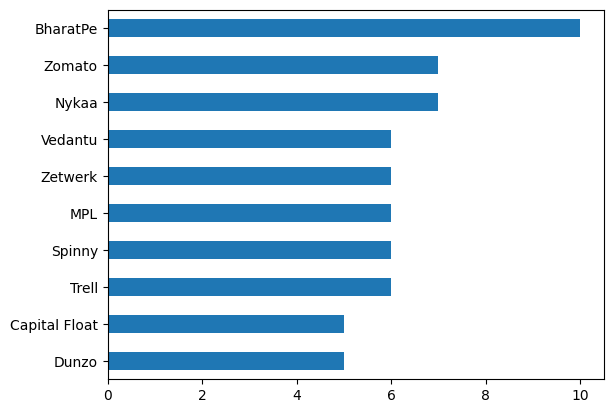

In [84]:
unique_brands.head(10).sort_values().plot.barh()

### Sector 
Similar sectors have to be grouped into one for easy analysis and easy visualization

In [85]:
complete_data_set["Sector"].value_counts()

FinTech                             175
EdTech                              148
Financial Services                   88
Fintech                              85
Edtech                               74
                                   ... 
Startup laboratory                    1
Online credit management startup      1
Battery design                        1
Eyeglasses                            1
Staffing & Recruiting                 1
Name: Sector, Length: 594, dtype: int64

In [86]:
complete_data_set['Sector'] = complete_data_set["Sector"].apply(lambda x: str(x).capitalize())


complete_data_set['Sector'] = complete_data_set["Sector"].apply(lambda x: str(x).replace(" and ", " & "))
complete_data_set["Sector"] = complete_data_set["Sector"].apply(lambda x: str(x).replace("startup", ""))
complete_data_set["Sector"]  = complete_data_set["Sector"].apply(lambda x: str(x).replace("  ", " "))

In [87]:
complete_data_set.loc[complete_data_set["Sector"] == "Accomodation", "Sector"] = "Housing & real estate"
complete_data_set.loc[complete_data_set["Sector"] == "Accounting", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Ad-tech", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Advertisement", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Advertising", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Advisory firm", "Sector"] = "Advisory & consultancy"
complete_data_set.loc[complete_data_set["Sector"] == "Aeorspace", "Sector"] = "Aviation & aerospace"
complete_data_set.loc[complete_data_set["Sector"] == "Aero company", "Sector"] = "Aviation & aerospace"
complete_data_set.loc[complete_data_set["Sector"] == "Aerospace", "Sector"] = "Aviation & aerospace"
complete_data_set.loc[complete_data_set["Sector"] == "Agri tech", "Sector"] = "Agriculture & agritech"
complete_data_set.loc[complete_data_set["Sector"] == "Agriculture", "Sector"] = "Agriculture & agritech"
complete_data_set.loc[complete_data_set["Sector"] == "Agritech", "Sector"] = "Agriculture & agritech"
complete_data_set.loc[complete_data_set["Sector"] == "Agritech/commerce", "Sector"] = "Agriculture & agritech"
complete_data_set.loc[complete_data_set["Sector"] == "Agtech", "Sector"] = "Agriculture & agritech"
complete_data_set.loc[complete_data_set["Sector"] == "Ai & data science", "Sector"] = "Ai"

In [88]:
complete_data_set.loc[complete_data_set["Sector"] == "Ai & debt", "Sector"] = "Ai"
complete_data_set.loc[complete_data_set["Sector"] == "Ai & deep learning", "Sector"] = "Ai"
complete_data_set.loc[complete_data_set["Sector"] == "Ai & media", "Sector"] = "Ai"
complete_data_set.loc[complete_data_set["Sector"] == "Ai & tech", "Sector"] = "Ai"
complete_data_set.loc[complete_data_set["Sector"] == "Ai chatbot", "Sector"] = "Ai"
complete_data_set.loc[complete_data_set["Sector"] == "Ai company", "Sector"] = "Ai"
complete_data_set.loc[complete_data_set["Sector"] == "Ai health", "Sector"] = "Ai"
complete_data_set.loc[complete_data_set["Sector"] == "Ai platform", "Sector"] = "Ai"
complete_data_set.loc[complete_data_set["Sector"] == "Ai robotics", "Sector"] = "Ai"
complete_data_set.loc[complete_data_set["Sector"] == "Ai", "Sector"] = "Ai"
complete_data_set.loc[complete_data_set["Sector"] == "Air transportation", "Sector"] = "Aviation & aerospace"
complete_data_set.loc[complete_data_set["Sector"] == "Alternative medicine", "Sector"] = "Medical"
complete_data_set.loc[complete_data_set["Sector"] == "Analytics", "Sector"] = "Data science & analytics"
complete_data_set.loc[complete_data_set["Sector"] == "Appliance", "Sector"] = "Appliances & Electronics"
complete_data_set.loc[complete_data_set["Sector"] == "Apps", "Sector"] = "Software"
complete_data_set.loc[complete_data_set["Sector"] == "Ar platform", "Sector"] = "Ar/vr"

In [89]:
complete_data_set.loc[complete_data_set["Sector"] == "Ar", "Sector"] = "Ar/vr"
complete_data_set.loc[complete_data_set["Sector"] == "Ar/vr", "Sector"] = "Ar/vr"
complete_data_set.loc[complete_data_set["Sector"] == "Artificial intelligence", "Sector"] = "Ai"
complete_data_set.loc[complete_data_set["Sector"] == "Audio", "Sector"] = "Entertainment"
complete_data_set.loc[complete_data_set["Sector"] == "Augmented reality", "Sector"] = "Ar/vr"
complete_data_set.loc[complete_data_set["Sector"] == "Auto-tech", "Sector"] = "Automation tech"
complete_data_set.loc[complete_data_set["Sector"] == "Automation", "Sector"] = "Automation tech"
complete_data_set.loc[complete_data_set["Sector"] == "Automobile & technology", "Sector"] = "Automobiles & automotives"
complete_data_set.loc[complete_data_set["Sector"] == "Automobile technology", "Sector"] = "Automobiles & automotives"
complete_data_set.loc[complete_data_set["Sector"] == "Automobile", "Sector"] = "Automobiles & automotives"
complete_data_set.loc[complete_data_set["Sector"] == "Automobiles", "Sector"] = "Automobiles & automotives"
complete_data_set.loc[complete_data_set["Sector"] == "Automotive & rentals", "Sector"] = "Automobiles & automotives"
complete_data_set.loc[complete_data_set["Sector"] == "Automotive and rentals", "Sector"] = "Automobiles & automotives"
complete_data_set.loc[complete_data_set["Sector"] == "Automotive company", "Sector"] = "Automobiles & automotives"
complete_data_set.loc[complete_data_set["Sector"] == "Automotive tech", "Sector"] = "Automobiles & automotives"
complete_data_set.loc[complete_data_set["Sector"] == "Automotive", "Sector"] = "Automobiles & automotives"
complete_data_set.loc[complete_data_set["Sector"] == "Autonomous vehicles", "Sector"] = "Automobiles & automotives"
complete_data_set.loc[complete_data_set["Sector"] == "Aviation", "Sector"] = "Aviation & aerospace"
complete_data_set.loc[complete_data_set["Sector"] == "Ayurveda tech", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "B2b agritech", "Sector"] = "Agriculture & agritech"
complete_data_set.loc[complete_data_set["Sector"] == "B2b e-commerce", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "B2b ecommerce", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "B2b manufacturing", "Sector"] = "Manufacturing"




In [90]:
complete_data_set.loc[complete_data_set["Sector"] == "B2b marketplace", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "B2b service", "Sector"] = "B2b"
complete_data_set.loc[complete_data_set["Sector"] == "B2b supply chain", "Sector"] = "Logistics & supply chain"
complete_data_set.loc[complete_data_set["Sector"] == "B2b travel", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "B2b", "Sector"] = "B2b"
complete_data_set.loc[complete_data_set["Sector"] == "Banking", "Sector"] = "Financial Services"
complete_data_set.loc[complete_data_set["Sector"] == "Battery design", "Sector"] = "Battery"
complete_data_set.loc[complete_data_set["Sector"] == "Battery manufacturer", "Sector"] = "Battery"
complete_data_set.loc[complete_data_set["Sector"] == "Beauty & wellness", "Sector"] = "Beauty"
complete_data_set.loc[complete_data_set["Sector"] == "Beauty products", "Sector"] = "Beauty"
complete_data_set.loc[complete_data_set["Sector"] == "Beverage", "Sector"] = "Consumer goods & services"
complete_data_set.loc[complete_data_set["Sector"] == "Beverage", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Beverages", "Sector"] = "Consumer goods & services"
complete_data_set.loc[complete_data_set["Sector"] == "Big data", "Sector"] = "Data science & analytics"
complete_data_set.loc[complete_data_set["Sector"] == "Bike marketplace", "Sector"] = "Bike services"
complete_data_set.loc[complete_data_set["Sector"] == "Bike rental", "Sector"] = "Bike services"
complete_data_set.loc[complete_data_set["Sector"] == "Biopharma", "Sector"] = "Pharmaceutical"
complete_data_set.loc[complete_data_set["Sector"] == "Biotech", "Sector"] = "Biotechnology"
complete_data_set.loc[complete_data_set["Sector"] == "Biotechnology company", "Sector"] = "Biotechnology"
complete_data_set.loc[complete_data_set["Sector"] == "Biotechnology", "Sector"] = "Biotechnology"
complete_data_set.loc[complete_data_set["Sector"] == "Blockchain", "Sector"] = "Cryptocurrency"
complete_data_set.loc[complete_data_set["Sector"] == "Blogging", "Sector"] = "Content services"
complete_data_set.loc[complete_data_set["Sector"] == "Brand marketing", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Broadcasting", "Sector"] = "Information services"
complete_data_set.loc[complete_data_set["Sector"] == "Business development", "Sector"] = "Advisory & consultancy"

In [91]:
#complete_set.loc[complete_set["Sector"] == "Business intelligence", "Sector"] = "Data science & analytics"
complete_data_set.loc[complete_data_set["Sector"] == "Business travel", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Cannabis", "Sector"] = "Agriculture & agritech"
complete_data_set.loc[complete_data_set["Sector"] == "Capital markets", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Car service", "Sector"] = "Automobiles & automotives"
complete_data_set.loc[complete_data_set["Sector"] == "Car trade", "Sector"] = "Automobiles & automotives"
complete_data_set.loc[complete_data_set["Sector"] == "Catering", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Children", "Sector"] = "Child care"
complete_data_set.loc[complete_data_set["Sector"] == "Classifieds", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "Clean energy", "Sector"] = "Clean energy"
complete_data_set.loc[complete_data_set["Sector"] == "Clean energy", "Sector"] = "Energy"
complete_data_set.loc[complete_data_set["Sector"] == "Cleantech", "Sector"] = "Clean energy"
complete_data_set.loc[complete_data_set["Sector"] == "Cleantech", "Sector"] = "Energy"
complete_data_set.loc[complete_data_set["Sector"] == "Clothing", "Sector"] = "Apparel & fashion"
complete_data_set.loc[complete_data_set["Sector"] == "Cloud company", "Sector"] = "Cloud computing"
complete_data_set.loc[complete_data_set["Sector"] == "Cloud infrastructure", "Sector"] = "Cloud computing"
complete_data_set.loc[complete_data_set["Sector"] == "Commerce", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Commercial real estate", "Sector"] = "Housing & real estate"
complete_data_set.loc[complete_data_set["Sector"] == "Commercial", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Communities", "Sector"] = "Social media & communities"
complete_data_set.loc[complete_data_set["Sector"] == "Communities", "Sector"] = "Social media & networking"
complete_data_set.loc[complete_data_set["Sector"] == "Community platform", "Sector"] = "Social media & communities"
complete_data_set.loc[complete_data_set["Sector"] == "Community platform", "Sector"] = "Social media & networking"
complete_data_set.loc[complete_data_set["Sector"] == "Community", "Sector"] = "Social media & communities"
complete_data_set.loc[complete_data_set["Sector"] == "Community", "Sector"] = "Social media & networking"
complete_data_set.loc[complete_data_set["Sector"] == "Computer games", "Sector"] = "Games"
complete_data_set.loc[complete_data_set["Sector"] == "Computer software", "Sector"] = "Software"
complete_data_set.loc[complete_data_set["Sector"] == "Construction tech", "Sector"] = "Construction"
complete_data_set.loc[complete_data_set["Sector"] == "Consultancy", "Sector"] = "Advisory & consultancy"
complete_data_set.loc[complete_data_set["Sector"] == "Consulting", "Sector"] = "Advisory & consultancy"
complete_data_set.loc[complete_data_set["Sector"] == "Consumer appliances", "Sector"] = "Consumer goods & services"
complete_data_set.loc[complete_data_set["Sector"] == "Consumer applications", "Sector"] = "Consumer goods & services"
complete_data_set.loc[complete_data_set["Sector"] == "Consumer electronics", "Sector"] = "Consumer goods & services"
complete_data_set.loc[complete_data_set["Sector"] == "Consumer goods", "Sector"] = "Consumer goods & services"

In [92]:
complete_data_set.loc[complete_data_set["Sector"] == "Consumer lending", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Consumer service", "Sector"] = "Consumer goods & services"
complete_data_set.loc[complete_data_set["Sector"] == "Consumer services", "Sector"] = "Consumer goods & services"
complete_data_set.loc[complete_data_set["Sector"] == "Consumer software", "Sector"] = "Consumer goods & services"
complete_data_set.loc[complete_data_set["Sector"] == "Consumer software", "Sector"] = "Software"
complete_data_set.loc[complete_data_set["Sector"] == "Consumer", "Sector"] = "Consumer goods & services"
complete_data_set.loc[complete_data_set["Sector"] == "Content commerce", "Sector"] = "Content services"
complete_data_set.loc[complete_data_set["Sector"] == "Content creation", "Sector"] = "Content services"
complete_data_set.loc[complete_data_set["Sector"] == "Content management", "Sector"] = "Content services"
complete_data_set.loc[complete_data_set["Sector"] == "Content marketplace", "Sector"] = "Content services"
complete_data_set.loc[complete_data_set["Sector"] == "Content marktplace", "Sector"] = "Content services"
complete_data_set.loc[complete_data_set["Sector"] == "Content publishing", "Sector"] = "Content services"
complete_data_set.loc[complete_data_set["Sector"] == "Continuing education", "Sector"] = "Education"
complete_data_set.loc[complete_data_set["Sector"] == "Conversational ai platform", "Sector"] = "Ai"
complete_data_set.loc[complete_data_set["Sector"] == "Cooking", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Cosmetics", "Sector"] = "Beauty"
complete_data_set.loc[complete_data_set["Sector"] == "Coworking", "Sector"] = "Co-working"
complete_data_set.loc[complete_data_set["Sector"] == "Creative agency", "Sector"] = "Arts & crafts"
complete_data_set.loc[complete_data_set["Sector"] == "Credit cards", "Sector"] = "Financial Services"
complete_data_set.loc[complete_data_set["Sector"] == "Credit", "Sector"] = "Financial Services"
complete_data_set.loc[complete_data_set["Sector"] == "Crm", "Sector"] = "Customer service"
complete_data_set.loc[complete_data_set["Sector"] == "Crypto", "Sector"] = "Cryptocurrency"
complete_data_set.loc[complete_data_set["Sector"] == "Customer service company", "Sector"] = "Customer service"
complete_data_set.loc[complete_data_set["Sector"] == "Cybersecurity", "Sector"] = "Computer & network security"
complete_data_set.loc[complete_data_set["Sector"] == "D2c business", "Sector"] = "D2c"
complete_data_set.loc[complete_data_set["Sector"] == "D2c fashion", "Sector"] = "Apparel & fashion"
complete_data_set.loc[complete_data_set["Sector"] == "D2c jewellery", "Sector"] = "Jewellery"
complete_data_set.loc[complete_data_set["Sector"] == "Dairy", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Data analytics", "Sector"] = "Data science & analytics"
complete_data_set.loc[complete_data_set["Sector"] == "Data intelligence", "Sector"] = "Data science & analytics"
complete_data_set.loc[complete_data_set["Sector"] == "Data science", "Sector"] = "Data science & analytics"
complete_data_set.loc[complete_data_set["Sector"] == "Dating app", "Sector"] = "Social media & networking"
complete_data_set.loc[complete_data_set["Sector"] == "Dating", "Sector"] = "Social media & networking"
complete_data_set.loc[complete_data_set["Sector"] == "Deep tech ai", "Sector"] = "Deep Tech"
complete_data_set.loc[complete_data_set["Sector"] == "Deep tech", "Sector"] = "Deep Tech"

In [93]:
complete_data_set.loc[complete_data_set["Sector"] == "Deeptech", "Sector"] = "Deep Tech"
complete_data_set.loc[complete_data_set["Sector"] == "Defense & space", "Sector"] = "Defense"
complete_data_set.loc[complete_data_set["Sector"] == "Defense tech", "Sector"] = "Defense"
complete_data_set.loc[complete_data_set["Sector"] == "Deisgning", "Sector"] = "Design"
complete_data_set.loc[complete_data_set["Sector"] == "Delivery service", "Sector"] = "Logistics & supply chain"
complete_data_set.loc[complete_data_set["Sector"] == "Delivery", "Sector"] = "Logistics & supply chain"
complete_data_set.loc[complete_data_set["Sector"] == "Dental", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Design", "Sector"] = ""
complete_data_set.loc[complete_data_set["Sector"] == "Dietary supplements", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Digital entertainment", "Sector"] = "Entertainment"
complete_data_set.loc[complete_data_set["Sector"] == "Digital marketing", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Digital media", "Sector"] = "Information services"
complete_data_set.loc[complete_data_set["Sector"] == "Digital mortgage", "Sector"] = "Financial Services"
complete_data_set.loc[complete_data_set["Sector"] == "E store", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "E-commerce & ar", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "E-commerce platforms", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "E-commerce", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "E-learning", "Sector"] = "Education"
complete_data_set.loc[complete_data_set["Sector"] == "E-market", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "E-marketplace", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "E-mobility", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "E-sports", "Sector"] = "Sports"
complete_data_set.loc[complete_data_set["Sector"] == "E-tail", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "Ecommerce", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "Edtech", "Sector"] = "Education"
complete_data_set.loc[complete_data_set["Sector"] == "Edttech", "Sector"] = "Edtech"
complete_data_set.loc[complete_data_set["Sector"] == "Edttech", "Sector"] = "Education"
complete_data_set.loc[complete_data_set["Sector"] == "Education management", "Sector"] = "Education"
complete_data_set.loc[complete_data_set["Sector"] == "Electricity", "Sector"] = "Energy"
complete_data_set.loc[complete_data_set["Sector"] == "Electronics", "Sector"] = "Appliances & Electronics"
complete_data_set.loc[complete_data_set["Sector"] == "Emobility", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Energy", "Sector"] = "Energy"
complete_data_set.loc[complete_data_set["Sector"] == "Enterprise software", "Sector"] = "Enterprise resource planning (erp)"
complete_data_set.loc[complete_data_set["Sector"] == "Environmental consulting", "Sector"] = "Environmental services"

In [94]:
complete_data_set.loc[complete_data_set["Sector"] == "Environmental service", "Sector"] = "Environmental services"
complete_data_set.loc[complete_data_set["Sector"] == "Equity management", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Esports", "Sector"] = "Sports"
complete_data_set.loc[complete_data_set["Sector"] == "Estore", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "Ev", "Sector"] = "Electric vehicle"
complete_data_set.loc[complete_data_set["Sector"] == "Events", "Sector"] = "Entertainment"
complete_data_set.loc[complete_data_set["Sector"] == "Eye wear", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Eyeglasses", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Eyewear", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Facilities support service", "Sector"] = "Facilities services"
complete_data_set.loc[complete_data_set["Sector"] == "Fantasy sports", "Sector"] = "Sports"
complete_data_set.loc[complete_data_set["Sector"] == "Farming", "Sector"] = "Agriculture & agritech"
complete_data_set.loc[complete_data_set["Sector"] == "Fashion & lifestyle", "Sector"] = "Apparel & fashion"
complete_data_set.loc[complete_data_set["Sector"] == "Fashion tech", "Sector"] = "Apparel & fashion"
complete_data_set.loc[complete_data_set["Sector"] == "Fashion", "Sector"] = "Apparel & fashion"
complete_data_set.loc[complete_data_set["Sector"] == "Femtech", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Fertility tech", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Finance company", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Finance", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Financial services", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Fintech", "Sector"] = "Fintech"
complete_data_set.loc[complete_data_set["Sector"] == "Fishery", "Sector"] = "Agriculture & agritech"
complete_data_set.loc[complete_data_set["Sector"] == "Fitness", "Sector"] = "Personal care"
complete_data_set.loc[complete_data_set["Sector"] == "Fmcg", "Sector"] = "Consumer goods & services"
complete_data_set.loc[complete_data_set["Sector"] == "Food & bevarages", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Food & beverage", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Food & beverages", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Food & logistics", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Food & nutrition", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Food & Nutrition", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Food & tech", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Food delivery", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Food devlivery", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Food diet", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Food industry", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Food processing", "Sector"] = "Food & Nutrition"

In [95]:
complete_data_set.loc[complete_data_set["Sector"] == "Food production", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Food tech", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Food", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Foodtech & logistics", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Foodtech", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Foootwear", "Sector"] = "Apparel & fashion"
complete_data_set.loc[complete_data_set["Sector"] == "Funding platform", "Sector"] = "Financial Services"
complete_data_set.loc[complete_data_set["Sector"] == "Furniture rental", "Sector"] = "Furniture & Home Decor"
complete_data_set.loc[complete_data_set["Sector"] == "Furniture", "Sector"] = "Furniture & Home Decor"
complete_data_set.loc[complete_data_set["Sector"] == "Fusion beverages", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Gaming", "Sector"] = "Games"
complete_data_set.loc[complete_data_set["Sector"] == "Healtcare", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Health & fitness", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Health & wellness", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Health and fitness", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Health care", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Health diagnostics", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Health insurance", "Sector"] = "Insurance"
complete_data_set.loc[complete_data_set["Sector"] == "Health", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Health, wellness & fitness", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Healthcare", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Healthcare/edtech", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Healthtech", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Heathcare", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Heathtech", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Helathcare", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Higher education", "Sector"] = "Education"
complete_data_set.loc[complete_data_set["Sector"] == "Home decor", "Sector"] = "Furniture & Home Decor"
complete_data_set.loc[complete_data_set["Sector"] == "Home design", "Sector"] = "Furniture & Home Decor"
complete_data_set.loc[complete_data_set["Sector"] == "Home interior services", "Sector"] = "Furniture & Home Decor"
complete_data_set.loc[complete_data_set["Sector"] == "Home services", "Sector"] = "Furniture & Home Decor"
complete_data_set.loc[complete_data_set["Sector"] == "Hospital & health care", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Hospital", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Hospitality", "Sector"] = "Tourism & Hospitality"
complete_data_set.loc[complete_data_set["Sector"] == "Housing & rentals", "Sector"] = "Housing & real estate"
complete_data_set.loc[complete_data_set["Sector"] == "Housing marketplace", "Sector"] = "Housing & real estate"

In [96]:
complete_data_set.loc[complete_data_set["Sector"] == "Housing", "Sector"] = "Housing & real estate"
complete_data_set.loc[complete_data_set["Sector"] == "Hr tech", "Sector"] = "Human Resources"
complete_data_set.loc[complete_data_set["Sector"] == "Hr", "Sector"] = "Human Resources"
complete_data_set.loc[complete_data_set["Sector"] == "Hrtech", "Sector"] = "Human Resources"
complete_data_set.loc[complete_data_set["Sector"] == "Human resources", "Sector"] = "Human Resources"
complete_data_set.loc[complete_data_set["Sector"] == "Hygiene management", "Sector"] = "Hygiene"
complete_data_set.loc[complete_data_set["Sector"] == "Information technology & services", "Sector"] = "Information technology"
complete_data_set.loc[complete_data_set["Sector"] == "Insurance tech", "Sector"] = "Insurance"
complete_data_set.loc[complete_data_set["Sector"] == "Insurance technology", "Sector"] = "Insurance"
complete_data_set.loc[complete_data_set["Sector"] == "Insuretech", "Sector"] = "Insurance"
complete_data_set.loc[complete_data_set["Sector"] == "Insurtech", "Sector"] = "Insurance"
complete_data_set.loc[complete_data_set["Sector"] == "Interior & decor", "Sector"] = "Furniture & Home Decor"
complete_data_set.loc[complete_data_set["Sector"] == "Interior design", "Sector"] = "Furniture & Home Decor"
complete_data_set.loc[complete_data_set["Sector"] == "Internet of things", "Sector"] = "IoT"
complete_data_set.loc[complete_data_set["Sector"] == "Investment banking", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Investment management", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Investment tech", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Investment", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Iot platform", "Sector"] = "IoT"
complete_data_set.loc[complete_data_set["Sector"] == "Iot/automobile", "Sector"] = "IoT"
complete_data_set.loc[complete_data_set["Sector"] == "It company", "Sector"] = "It"
complete_data_set.loc[complete_data_set["Sector"] == "Job discovery platform", "Sector"] = "Job search"
complete_data_set.loc[complete_data_set["Sector"] == "Job portal", "Sector"] = "Job search"
complete_data_set.loc[complete_data_set["Sector"] == "Last mile transportation", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Legal services", "Sector"] = "Legal"
complete_data_set.loc[complete_data_set["Sector"] == "Legal tech", "Sector"] = "Legal"
complete_data_set.loc[complete_data_set["Sector"] == "Legaltech", "Sector"] = "Legal"
complete_data_set.loc[complete_data_set["Sector"] == "Logistics", "Sector"] = "Logistics & supply chain"
complete_data_set.loc[complete_data_set["Sector"] == "Logitech", "Sector"] = "Logistics & supply chain"
complete_data_set.loc[complete_data_set["Sector"] == "Luxury car", "Sector"] = "Automobiles & automotives"
complete_data_set.loc[complete_data_set["Sector"] == "Management consulting", "Sector"] = "Advisory"
complete_data_set.loc[complete_data_set["Sector"] == "Market research", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Marketing & advertising", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Marketing & customer loyalty", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Marketing company", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Marketing", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Marketplace", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "Martech", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Matrimony", "Sector"] = "Marriage"
complete_data_set.loc[complete_data_set["Sector"] == "Mechanical & industrial engineering", "Sector"] = "Engineering"
complete_data_set.loc[complete_data_set["Sector"] == "Mechanical or industrial engineering", "Sector"] = "Engineering"
complete_data_set.loc[complete_data_set["Sector"] == "Med tech", "Sector"] = "Medical"

In [97]:
complete_data_set.loc[complete_data_set["Sector"] == "Publication", "Sector"] = "Information services"
complete_data_set.loc[complete_data_set["Sector"] == "Real estate", "Sector"] = "Housing & real estate"
complete_data_set.loc[complete_data_set["Sector"] == "Real Estate", "Sector"] = "Housing & real estate"
complete_data_set.loc[complete_data_set["Sector"] == "Reatil", "Sector"] = "Retail"
complete_data_set.loc[complete_data_set["Sector"] == "Recruitment", "Sector"] = "Human Resources"
complete_data_set.loc[complete_data_set["Sector"] == "Renewable player", "Sector"] = "Renewable energy"
complete_data_set.loc[complete_data_set["Sector"] == "Renewables & environment", "Sector"] = "Renewable energy"
complete_data_set.loc[complete_data_set["Sector"] == "Rental space", "Sector"] = "Rentals"
complete_data_set.loc[complete_data_set["Sector"] == "Rental", "Sector"] = "Rentals"
complete_data_set.loc[complete_data_set["Sector"] == "Retail aggregator", "Sector"] = "Retail"
complete_data_set.loc[complete_data_set["Sector"] == "Retail tech", "Sector"] = "Retail"
complete_data_set.loc[complete_data_set["Sector"] == "Robotics & ai", "Sector"] = "Ai"
complete_data_set.loc[complete_data_set["Sector"] == "Robotics", "Sector"] = "Ai"
complete_data_set.loc[complete_data_set["Sector"] == "Saas platform", "Sector"] = "SAAS"
complete_data_set.loc[complete_data_set["Sector"] == " Saas", "Sector"] = "SAAS"
complete_data_set.loc[complete_data_set["Sector"] == "Saas/edtech", "Sector"] = "SAAS"
complete_data_set.loc[complete_data_set["Sector"] == "SaasÂ Â startup", "Sector"] = "SAAS"
complete_data_set.loc[complete_data_set["Sector"] == "Sales & distribution", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Sales & services", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Sales and distribution", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Sanitation solutions", "Sector"] = "Hygiene"
complete_data_set.loc[complete_data_set["Sector"] == "Skincare", "Sector"] = "Apparel & fashion"
complete_data_set.loc[complete_data_set["Sector"] == "Skincare", "Sector"] = "Beauty"
complete_data_set.loc[complete_data_set["Sector"] == "Sles & marketing", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Sles and marketing", "Sector"] = "Advertising, marketing & sales"
complete_data_set.loc[complete_data_set["Sector"] == "Social audio", "Sector"] = "Entertainment"
complete_data_set.loc[complete_data_set["Sector"] == "Social commerce", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "Social community", "Sector"] = "Social media & networking"
complete_data_set.loc[complete_data_set["Sector"] == "Social e-commerce", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "Social media & communities", "Sector"] = "Social media & networking"
complete_data_set.loc[complete_data_set["Sector"] == "Social media", "Sector"] = "Social media & networking"
complete_data_set.loc[complete_data_set["Sector"] == "Social network", "Sector"] = "Social media & networking"
complete_data_set.loc[complete_data_set["Sector"] == "Social platform", "Sector"] = "Social media & networking"
complete_data_set.loc[complete_data_set["Sector"] == "Software company", "Sector"] = "Software"
complete_data_set.loc[complete_data_set["Sector"] == "Soil-tech", "Sector"] = "Agriculture & agritech"
complete_data_set.loc[complete_data_set["Sector"] == "Solar monitoring company", "Sector"] = "Solar energy"
complete_data_set.loc[complete_data_set["Sector"] == "Solar saas", "Sector"] = "Solar energy"
complete_data_set.loc[complete_data_set["Sector"] == "Solar solution", "Sector"] = "Solar energy"
complete_data_set.loc[complete_data_set["Sector"] == "Solar", "Sector"] = "Solar energy"
complete_data_set.loc[complete_data_set["Sector"] == "Sportstech", "Sector"] = "Sports"
complete_data_set.loc[complete_data_set["Sector"] == "Staffing & recruiting", "Sector"] = "Human Resources"
complete_data_set.loc[complete_data_set["Sector"] == "Supply chain platform", "Sector"] = "Logistics & supply chain"

In [98]:
complete_data_set.loc[complete_data_set["Sector"] == "Supply chain, agritech", "Sector"] = "Logistics & supply chain"
complete_data_set.loc[complete_data_set["Sector"] == "Taxation", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Tech company", "Sector"] = "Tech"
complete_data_set.loc[complete_data_set["Sector"] == "Tech hub", "Sector"] = "Tech"
complete_data_set.loc[complete_data_set["Sector"] == "Tech platform", "Sector"] = "Tech"
complete_data_set.loc[complete_data_set["Sector"] == "Technology", "Sector"] = "Tech"
complete_data_set.loc[complete_data_set["Sector"] == "Techonology", "Sector"] = "Tech"
complete_data_set.loc[complete_data_set["Sector"] == "Telecommuncation", "Sector"] = "Telecommunication"
complete_data_set.loc[complete_data_set["Sector"] == "Telecommunications", "Sector"] = "Telecommunication"
complete_data_set.loc[complete_data_set["Sector"] == "Textiles", "Sector"] = "Apparel & fashion"
complete_data_set.loc[complete_data_set["Sector"] == "Tobacco", "Sector"] = "Agriculture & agritech"
complete_data_set.loc[complete_data_set["Sector"] == "Tourism & ev", "Sector"] = "Tourism & Hospitality"
complete_data_set.loc[complete_data_set["Sector"] == "Tourism", "Sector"] = "Tourism & Hospitality"
complete_data_set.loc[complete_data_set["Sector"] == "Trading platform", "Sector"] = "E-commerce"
complete_data_set.loc[complete_data_set["Sector"] == "Training", "Sector"] = "Human Resources"
complete_data_set.loc[complete_data_set["Sector"] == "Transport & rentals", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Transport automation", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Transport", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Transportation", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Travel & saas", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Travel tech", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Travel", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Traveltech", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Vehicle repair", "Sector"] = "Automobiles & automotives"
complete_data_set.loc[complete_data_set["Sector"] == "Venture capital & private equity", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Venture capital", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Venture capitalist", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Veterinary", "Sector"] = "Animal Care"
complete_data_set.loc[complete_data_set["Sector"] == "Video personalization", "Sector"] = "Video communication"
complete_data_set.loc[complete_data_set["Sector"] == "Video platform", "Sector"] = "Video communication"
complete_data_set.loc[complete_data_set["Sector"] == "Video sharing platform", "Sector"] = "Video communication"
complete_data_set.loc[complete_data_set["Sector"] == "Video streaming platform", "Sector"] = "Video communication"
complete_data_set.loc[complete_data_set["Sector"] == "Video", "Sector"] = "Video communication"
complete_data_set.loc[complete_data_set["Sector"] == "Virtual auditing", "Sector"] = "Financial Services"
complete_data_set.loc[complete_data_set["Sector"] == "Virtual banking", "Sector"] = "Financial Services"
complete_data_set.loc[complete_data_set["Sector"] == "Visual media", "Sector"] = "Information services"
complete_data_set.loc[complete_data_set["Sector"] == "Vr & saas", "Sector"] = "Ar/vr"
complete_data_set.loc[complete_data_set["Sector"] == "Wealth management", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Wedding", "Sector"] = "Marriage"
complete_data_set.loc[complete_data_set["Sector"] == "Wellness", "Sector"] = "Personal care"

In [99]:
complete_data_set.loc[complete_data_set["Sector"] == "Wine & spirits", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Yoga & wellness", "Sector"] = "Personal care"

In [100]:
complete_data_set.loc[complete_data_set["Sector"] == "Media & entertainment", "Sector"] = "Media"
complete_data_set.loc[complete_data_set["Sector"] == "Media & networking", "Sector"] = "Media"
complete_data_set.loc[complete_data_set["Sector"] == "Media and entertainment", "Sector"] = "Media"
complete_data_set.loc[complete_data_set["Sector"] == "Media tech", "Sector"] = "Media"
complete_data_set.loc[complete_data_set["Sector"] == "Medical device", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Medtech", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Mental health", "Sector"] = "Medicine & healthcare"
complete_data_set.loc[complete_data_set["Sector"] == "Micro-mobiity", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Milk", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Mlops platform", "Sector"] = "Machine learning"
complete_data_set.loc[complete_data_set["Sector"] == "Mobile games", "Sector"] = "Games"
complete_data_set.loc[complete_data_set["Sector"] == "Mobile games", "Sector"] = "Mobile"
complete_data_set.loc[complete_data_set["Sector"] == "Mobile payments", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Mobility tech", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Mobility", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Mobility/transport", "Sector"] = "Travel & Transport"
complete_data_set.loc[complete_data_set["Sector"] == "Music streaming", "Sector"] = "Entertainment"
complete_data_set.loc[complete_data_set["Sector"] == "Music", "Sector"] = "Entertainment"
complete_data_set.loc[complete_data_set["Sector"] == "Mutual funds", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Nano distribution network", "Sector"] = "Logistics & supply chain"
complete_data_set.loc[complete_data_set["Sector"] == "Neo-banking", "Sector"] = "Financial services"
complete_data_set.loc[complete_data_set["Sector"] == "Networking platform", "Sector"] = "Social media & networking"
complete_data_set.loc[complete_data_set["Sector"] == "Networking", "Sector"] = "Social media & networking"
complete_data_set.loc[complete_data_set["Sector"] == "News", "Sector"] = "Information services"
complete_data_set.loc[complete_data_set["Sector"] == "Nft marketplace", "Sector"] = "NFT"
complete_data_set.loc[complete_data_set["Sector"] == "Nft", "Sector"] = "NFT"
complete_data_set.loc[complete_data_set["Sector"] == "Nutrition sector", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Nutrition tech", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Nutrition", "Sector"] = "Food & Nutrition"
complete_data_set.loc[complete_data_set["Sector"] == "Oil & energy", "Sector"] = "Energy"
complete_data_set.loc[complete_data_set["Sector"] == "Online credit management", "Sector"] = "Financial Services"
complete_data_set.loc[complete_data_set["Sector"] == "Online financial service", "Sector"] = "Financial Services"
complete_data_set.loc[complete_data_set["Sector"] == "Online games", "Sector"] = "Games"
complete_data_set.loc[complete_data_set["Sector"] == "Online media", "Sector"] = "Information services"
complete_data_set.loc[complete_data_set["Sector"] == "Online portals", "Sector"] = "Information services"
complete_data_set.loc[complete_data_set["Sector"] == "Packaging solution", "Sector"] = "Packaging services"
complete_data_set.loc[complete_data_set["Sector"] == "Pet care", "Sector"] = "Animal Care"
complete_data_set.loc[complete_data_set["Sector"] == "Pharma", "Sector"] = "Pharmaceutical"
complete_data_set.loc[complete_data_set["Sector"] == "Pharmacy", "Sector"] = "Pharmaceutical"
complete_data_set.loc[complete_data_set["Sector"] == "Podcast", "Sector"] = "Entertainment"
complete_data_set.loc[complete_data_set["Sector"] == "Pollution control equiptment", "Sector"] = "Hygiene"
complete_data_set.loc[complete_data_set["Sector"] == "Preschool daycare", "Sector"] = "Education"
complete_data_set.loc[complete_data_set["Sector"] == "Professional training & coaching", "Sector"] = "Human Resources"

In [101]:
unique_sectors = (complete_data_set.loc[:,"Sector"]).value_counts()
unique_sectors

Education                280
Fintech                  260
Medicine & healthcare    228
E-commerce               158
Financial services       147
                        ... 
Fm                         1
Luxury car                 1
Qsr                        1
Ar/vr                      1
Product studio             1
Name: Sector, Length: 202, dtype: int64

Text(0.5, 1.0, '10 Sectors With The Most Funding Deals')

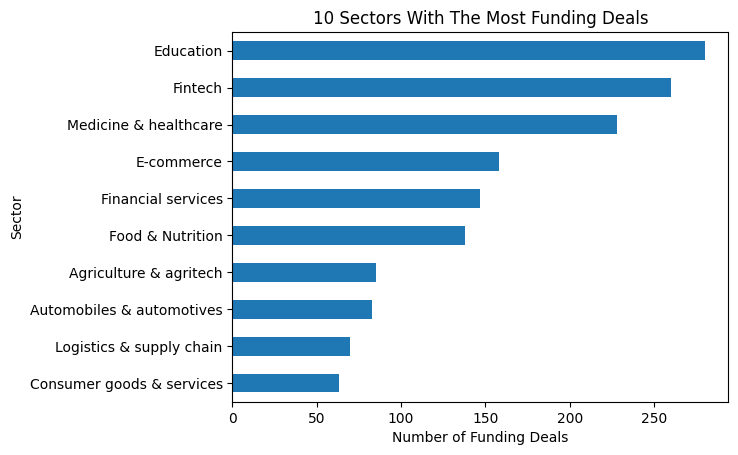

In [102]:
# ploting the top 10 sectors with the most funding deals from 2018-2021
unique_sectors.head(10).sort_values().plot.barh()
plt.xlabel("Number of Funding Deals")
plt.ylabel("Sector")
plt.title("10 Sectors With The Most Funding Deals")

Here, we note that startups in the education (280), fintech (260), and medicine & healthcare (228) sectors were involved in most transactions over the period, with financial services (166) and e-commerce (158) following in distance. The top 10 (out of 202) sectors, by number of deals, make up about 53% of the total deals over the period. It will therefore be fair to conclude that funding is centralized around a few sectors.

### Funding Stage
Operations would have to be done on the funding stage column to make it presentable for data analysis

In [103]:
complete_data_set["Stage"].value_counts().head(60)

Seed                        612
Series A                    306
Pre-series A                212
Series B                    134
Series C                    115
Seed Round                   69
Pre series A                 62
Pre-seed                     58
Series D                     51
Debt                         45
Angel                        37
Venture - Series Unknown     37
Series E                     30
Pre-series B                 14
Debt Financing               13
Pre Series A                 12
Series F                     11
Private Equity               10
Seed round                   10
Bridge                        8
Pre-Seed                      8
Corporate Round               8
Grant                         4
Pre seed round                4
Pre-series A1                 4
Angel Round                   4
Series H                      4
Series G                      3
Seed funding                  3
Post-IPO Equity               3
Secondary Market              3
Pre-seri

As seen from above, similar funding stage types have to be grouped together and given the same name for easier analysis visualization.

In [104]:
complete_data_set["Stage"] = complete_data_set["Stage"].apply(lambda x: str(x).replace(" Round",""))
complete_data_set["Stage"] = complete_data_set["Stage"].apply(lambda x: str(x).replace(" round",""))
complete_data_set["Stage"] = complete_data_set["Stage"].apply(lambda x: str(x).replace("- Series Unknown",""))

In [105]:
complete_data_set.loc[complete_data_set["Stage"]== "Series A"]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding,Founded,Founders,Investor
2,Myloancare,Financial Services,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0,2018,NaN,NaN,NaN
20,Cogoport,Aviation & aerospace,Series A,Mumbai,Cogoport is a platform that provides freight b...,6000000.0,2018,NaN,NaN,NaN
25,Agnext technologies,Agriculture & agritech,Series A,Mohali,AgNext is an agricultural sensing and solution...,NaN,2018,NaN,NaN,NaN
35,Loadshare,Industrial automation,Series A,Bengaluru,LoadShare is India’s fastest growing logistics...,5000000.0,2018,NaN,NaN,NaN
36,Yumlane,Food & Nutrition,Series A,Mumbai,Food startup Yumlane operated by QwikPik Techn...,4000000.0,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2844,Revos,Automobiles & automotives,Series A,Bangalore,REVOS is a smart mobility platform that empowe...,4000000.0,2021,2017.0,"Mohit Yadav, Jyotrian Jan Harichandran",NaN
2846,Appsforbharat,Product studio,Series A,Bangalore,A mission to assist a billion Indians in their...,10000000.0,2021,2020.0,Prashant Sachan,Elevation Capital
2848,Bikayi,E-commerce,Series A,Hyderabad,Empowering SMBs in India,10000000.0,2021,2019.0,"Sonakshi Nathani, Ashutosh Singla",Sequoia Capital India
2850,Dukaan,Retail,Series A,Bangalore,Help forward thinking entrepreneurs by providi...,11000000.0,2021,2020.0,"Suumit Shah, Subhash Choudhary","HOF Capital, Old Well Ventures, LetsVenture, 9..."


In [106]:
# Equating similar entries in the Sector column for ease of analysis (2)
complete_data_set.loc[complete_data_set["Stage"] == "$6000000", "Stage"] = "Venture"
complete_data_set.loc[complete_data_set["Stage"] == "Debt Financing", "Stage"] = "Debt"
complete_data_set.loc[complete_data_set["Stage"] == "Early seed", "Stage"] = "Seed"
complete_data_set.loc[complete_data_set["Stage"] == "Fresh Funding", "Stage"] = "Seed"
complete_data_set.loc[complete_data_set["Stage"] == "Fresh funding", "Stage"] = "Seed"
complete_data_set.loc[complete_data_set["Stage"] == "nan", "Stage"] = "Undisclosed"
complete_data_set.loc[complete_data_set["Stage"] == "PE", "Stage"] = "Private Equity"
complete_data_set.loc[complete_data_set["Stage"] == "Pre seed", "Stage"] = "Pre-seed"
complete_data_set.loc[complete_data_set["Stage"] == "Pre series A1", "Stage"] = "Pre-series A"
complete_data_set.loc[complete_data_set["Stage"] == "Pre- series A", "Stage"] = "Pre-series A"
complete_data_set.loc[complete_data_set["Stage"] == "Pre-Series A", "Stage"] = "Pre-series A"
complete_data_set.loc[complete_data_set["Stage"] == "Pre-Series A1", "Stage"] = "Pre-series A"
complete_data_set.loc[complete_data_set["Stage"] == "Seed fund", "Stage"] = "Seed"
complete_data_set.loc[complete_data_set["Stage"] == "Seed funding", "Stage"] = "Seed"
complete_data_set.loc[complete_data_set["Stage"] == "Seed Funding", "Stage"] = "Seed"
complete_data_set.loc[complete_data_set["Stage"] == "Seies A", "Stage"] = "Series A"
complete_data_set.loc[complete_data_set["Stage"] == "Series A2", "Stage"] = "Series A"
complete_data_set.loc[complete_data_set["Stage"] == "Series I", "Stage"] = "Series A"
complete_data_set.loc[complete_data_set["Stage"] == "Pre Series A", "Stage"] = "Pre-series A"
complete_data_set.loc[complete_data_set["Stage"] == "Pre series A", "Stage"] = "Pre-series A"
complete_data_set.loc[complete_data_set["Stage"] == "Pre series B", "Stage"] = "Pre-series B"
complete_data_set.loc[complete_data_set["Stage"] == "Pre series C", "Stage"] = "Pre-series C"
complete_data_set.loc[complete_data_set["Stage"] == "Pre-Seed", "Stage"] = "Pre-seed"
complete_data_set.loc[complete_data_set["Stage"] == "Pre-series A1", "Stage"] = "Pre-series A"
complete_data_set.loc[complete_data_set["Stage"] == "Seed & Series A", "Stage"] = "Series A"
complete_data_set.loc[complete_data_set["Stage"] == "Seed A", "Stage"] = "Series A"
complete_data_set.loc[complete_data_set["Stage"] == "Seed Investment", "Stage"] = "Seed"
complete_data_set.loc[complete_data_set["Stage"] == "Seed+", "Stage"] = "Seed"
complete_data_set.loc[complete_data_set["Stage"] == "Pre-Series B", "Stage"] = "Pre-series B"

In [107]:
complete_data_set["Stage"].value_counts().head(15)

Undisclosed       934
Seed              701
Series A          311
Pre-series A      292
Series B          134
Series C          115
Pre-seed           73
Debt               58
Series D           51
Angel              41
Venture            37
Series E           30
Pre-series B       18
Private Equity     11
Series F           11
Name: Stage, dtype: int64

Text(0.5, 1.0, 'Number of Funding Per Funding Stage')

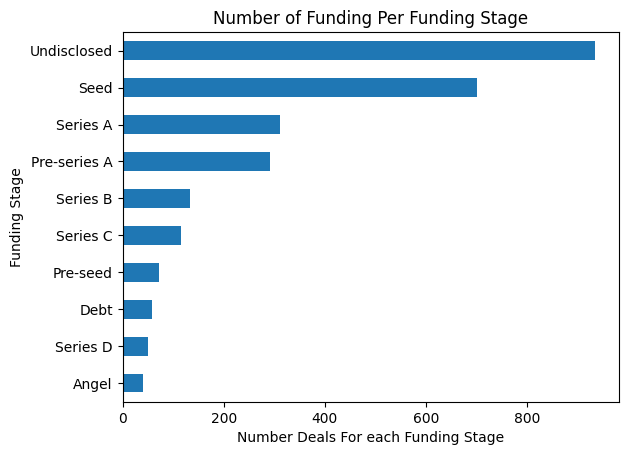

In [108]:
complete_data_set["Stage"].value_counts().head(10).sort_values().plot.barh()
plt.xlabel("Number Deals For each Funding Stage")
plt.ylabel("Funding Stage")
plt.title("Number of Funding Per Funding Stage")


We note from the plot above that most of the funding stages for deals over the period were undisclosed. For the disclosed stages, "Seed" round had the most deals by a mile (934) followed by "Series A" (311) and "Pre-Series A" (292), with "Series B" and "Series C" following in the distance with 134 and 115 deals respectively.

### Amount

Further processing needs to be done on the Amount column for proper visualization 

In [109]:
unique_amount = complete_data_set["Amount($)"].value_counts()
unique_amount.head(15)

1000000.0     172
0.0           140
2000000.0     116
3000000.0      81
5000000.0      81
500000.0       71
10000000.0     64
4000000.0      54
200000.0       51
1500000.0      47
300000.0       45
6000000.0      44
30000000.0     41
400000.0       39
15000000.0     33
Name: Amount($), dtype: int64

In [110]:
pd.set_option("display.float_format",lambda x: '%0.2f'% x)

In [111]:
complete_data_set.loc[complete_data_set["Amount($)"]== "nan","Amount($)"] = np.nan
complete_data_set["Amount($)"].fillna(0.00,inplace= True)




In [112]:
def outliers_IQR(dataframe):
    q1 = dataframe.quantile(0.25)
    q3 = dataframe.quantile(0.75)
    IQR = q3 - q1
    outliers = dataframe[(dataframe<(q1 - 1.5*IQR)) | (dataframe>(q3 + 1.5*IQR))]
    return outliers

outliers = outliers_IQR(complete_data_set["Amount($)"])
print(f"the number of outliers {str(len(outliers))}","\n")
number_amount = len(complete_data_set["Amount($)"])
print(f"Percentage outliers is {str(((len(outliers))/((number_amount))*100))}%", "\n")
print(f"The maximumum outlier is {str(outliers.max())}","\n")
print(f"The minimum outlier is {str(outliers.min())}")

the number of outliers 470 

Percentage outliers is 16.342141863699585% 

The maximumum outlier is 150000000000.0 

The minimum outlier is 20000000.0


Since the outliers represent over 16% of the data available, it would be unwise to remove all of them. Outliers from the top and bottom will be selected for confirmation online, then further action taken on them.

In [113]:
# looking the organisations that form the outliers 
amount_sorted = complete_data_set.loc[complete_data_set["Amount($)"]!=0].round(2).sort_values(by = "Amount($)")
amount_sorted

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding,Founded,Founders,Investor
1166,Satya microcapital,Fintech,Undisclosed,Delhi,Microfinance company that offers collateral-fr...,9.60,2020,1995,Vivek Tiwari,BlueOrchard Finance Limited
1448,Peel works,Saas,"Series C, D",Mumbai,E-commerce for corner/retail stores.,42.23,2020,2010,"Sachin Chhabra, Nidhi Ramachandran",CESC Ventures
70,Ultraviolette automotive,Automobiles & automotives,Series A,Bangalore,Ultraviolette is a startup working on electric...,724.80,2018,NaN,NaN,NaN
98,Next digital solutions,"Advertising, marketing & sales",Angel,Kota,Next Digital Solutions is website design & Dig...,1208.00,2018,NaN,NaN,NaN
164,Classworks india,Education,Undisclosed,Chennai,"Saas, Web App, Mobile App, School Education",1208.00,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
101,Swiggy,Food & Nutrition,Series H,Bangalore,Swiggy is a food ordering and delivery company...,1000000000.00,2018,NaN,NaN,NaN
943,Reliance,Multinational conglomerate company,Undisclosed,Mumbai,Reliance owns businesses across India engaged ...,2200000000.00,2020,1973,Dhirubhai Ambani,"Facebook, Google, KKR, Silver Lake"
932,Snowflake,Tech,Undisclosed,California,Snowflake is a cloud data platform that provid...,3000000000.00,2020,2012,"Benoit Dageville, Bob Muglia, Marcin Zukowski,...","Salesforce Ventures, Dragoneer Investment Group"
895,Reliance retail ventures ltd,Retail,Undisclosed,Mumbai,Reliance Retail offers online shopping and a c...,70000000000.00,2020,2006,Mukesh Ambani,"Silver Lake, Mubadala Investment Company"


In [114]:
#SATYA Microcapital (raised ₹725M debt financing from BlueOrchard in 2020 to be converted at 74.1322 INR/USD)
complete_data_set.loc[(complete_data_set["Company/Brand"]=="Satya microcapital") & 
(complete_data_set["Amount($)"] == 9.60), ["Stage","Amount($)","Investors"]] = ["Debt",int(725000000*0.0128),"BlueOrchard Finance S A"]

complete_data_set.loc[(complete_data_set["Company/Brand"]=="Satya microcapital")]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding,Founded,Founders,Investor,Investors
469,Satya microcapital,Financial services,Venture,New Delhi,New Delhi-based non-banking financial company.,4832000.00,2018,NaN,NaN,NaN,NaN
1166,Satya microcapital,Fintech,Debt,Delhi,Microfinance company that offers collateral-fr...,9280000.00,2020,1995,Vivek Tiwari,BlueOrchard Finance Limited,BlueOrchard Finance S A
1807,Satya microcapital,Financial Services,Undisclosed,New Delhi,Satya MicroCapital Limited is a Delhi based NB...,10000000.00,2021,2017.0,Vivek Tiwari,"responsAbility Investments, Blue Orchard",NaN
2035,Satya microcapital,Fintech,Undisclosed,New Delhi,Satya MicroCapital is a micro finance company ...,20000000.00,2021,2017.0,Vivek Tiwari,"BlueOrchard Finance S A, Gojo & Company",NaN


In [115]:
## Ultraviolette Automotive: raised ₹60M Series A funding in 2018
complete_data_set.loc[(complete_data_set["Company/Brand"] == "Ultraviolette automotive") &
                 (complete_data_set["Amount($)"] == 724.80),
                 ["Stage", "Amount($)"]] = ["Series A", int(60000000*0.0128)]

complete_data_set.loc[(complete_data_set["Company/Brand"] == "Ultraviolette automotive")]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding,Founded,Founders,Investor,Investors
70,Ultraviolette automotive,Automobiles & automotives,Series A,Bangalore,Ultraviolette is a startup working on electric...,724.80,2018,NaN,NaN,NaN,NaN
849,Ultraviolette automotive,Automobiles & automotives,Series B,Bangalore,Ultraviolette Automotive is a technology start...,4000000.00,2020,2014,"Narayan Subramaniam, Niraj Rajmohan",TVS Motor Company,NaN
1047,Ultraviolette automotive,Automation tech,Series B,Bangalore,Industries Automotive Electric Vehicle Energy ...,410000.00,2020,2015,"Narayan Subramaniam, Niraj Rajmohan",TVS Motor Company,NaN


In [116]:
sorted = (complete_data_set.loc[complete_data_set["Amount($)"]!=0]).round(2).sort_values(by="Amount($)")
sorted

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding,Founded,Founders,Investor,Investors
1448,Peel works,Saas,"Series C, D",Mumbai,E-commerce for corner/retail stores.,42.23,2020,2010,"Sachin Chhabra, Nidhi Ramachandran",CESC Ventures,NaN
70,Ultraviolette automotive,Automobiles & automotives,Series A,Bangalore,Ultraviolette is a startup working on electric...,724.80,2018,NaN,NaN,NaN,NaN
164,Classworks india,Education,Undisclosed,Chennai,"Saas, Web App, Mobile App, School Education",1208.00,2018,NaN,NaN,NaN,NaN
98,Next digital solutions,"Advertising, marketing & sales",Angel,Kota,Next Digital Solutions is website design & Dig...,1208.00,2018,NaN,NaN,NaN,NaN
258,Enlyft digital solutions private limited,—,Seed,Pune,Digital Marketing Agency,2416.00,2018,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
101,Swiggy,Food & Nutrition,Series H,Bangalore,Swiggy is a food ordering and delivery company...,1000000000.00,2018,NaN,NaN,NaN,NaN
943,Reliance,Multinational conglomerate company,Undisclosed,Mumbai,Reliance owns businesses across India engaged ...,2200000000.00,2020,1973,Dhirubhai Ambani,"Facebook, Google, KKR, Silver Lake",NaN
932,Snowflake,Tech,Undisclosed,California,Snowflake is a cloud data platform that provid...,3000000000.00,2020,2012,"Benoit Dageville, Bob Muglia, Marcin Zukowski,...","Salesforce Ventures, Dragoneer Investment Group",NaN
895,Reliance retail ventures ltd,Retail,Undisclosed,Mumbai,Reliance Retail offers online shopping and a c...,70000000000.00,2020,2006,Mukesh Ambani,"Silver Lake, Mubadala Investment Company",NaN


Text(0.5, 1.0, 'Distribution of funding amount')

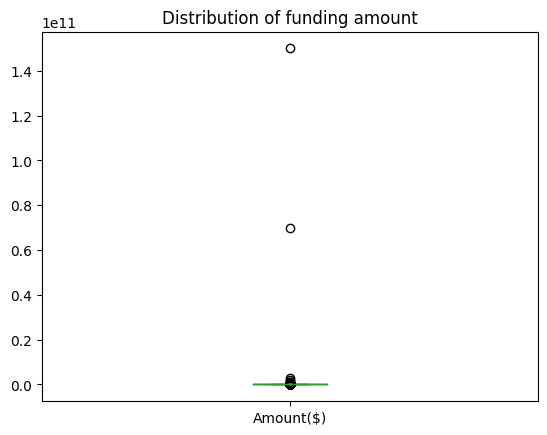

In [117]:
(sorted.loc[sorted["Amount($)"]>0]).plot.box()
(sorted.loc[sorted["Amount($)"]>0]).describe()
plt.title("Distribution of funding amount")

In [118]:
(sorted.loc[sorted["Amount($)"]>0]).describe()

,Amount($)
count,2326.00
mean,120503208.36
std,3432584897.24
min,42.23
25%,973882.50
50%,3000000.00
75%,12000000.00
max,150000000000.00


In [119]:
complete_data_set.loc[(complete_data_set["Amount($)"]==150000000000.00)| (complete_data_set["Amount($)"]==70000000000.00)]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding,Founded,Founders,Investor,Investors
895,Reliance retail ventures ltd,Retail,Undisclosed,Mumbai,Reliance Retail offers online shopping and a c...,70000000000.00,2020,2006,Mukesh Ambani,"Silver Lake, Mubadala Investment Company",NaN
1742,Alteria capital,Fintech,Debt,Mumbai,Alteria Capital is a Venture debt firm .,150000000000.00,2021,2018.0,Vinod Murali,NaN,NaN


Despite being correct entries, the top 2 outliers Alteria Capital (index 1742) and Reliance Retail Ventures Ltd (index 895) will be dropped to assess their impact on the amounts.

In [120]:
complete_data_set_no_outliers = complete_data_set.drop([895,1742], axis = 0)

<AxesSubplot: >

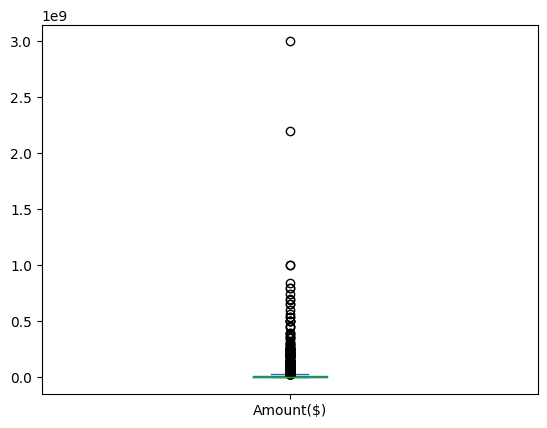

In [121]:
sorted = (complete_data_set_no_outliers[complete_data_set_no_outliers["Amount($)"]>0]).round(2).sort_values(by = "Amount($)")
(sorted.loc[sorted["Amount($)"]>0]).describe()
(sorted.loc[sorted["Amount($)"]>0]).plot.box()

In [122]:
(sorted.loc[sorted["Amount($)"]>0]).describe()

,Amount($)
count,2324.00
mean,25942539.87
std,107504999.58
min,42.23
25%,969850.00
50%,3000000.00
75%,12000000.00
max,3000000000.00


Per the boxplots for the complete set with the two major outliers and that without the two major outliers, their effects on the mean is evident, at USD 121.27m with outliers and USD 25.90m without outliers. This represents a stark USD 95.37m difference between the two datasets. Even so, it is visible from the boxplot for the complete set without outliers that there are two more big outliers dragging the USD 25.90m mean outward, with the next looking relatively close to the norm.

As such, the **median** of **USD 3m** (in both cases - with and without outliers) will be used for computations and analysis for the "average" startup. That is to say that the average funding deal over the period was worth **USD 3m**.

## Location

In [123]:
complete_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    2876 non-null   object 
 1   Sector           2876 non-null   object 
 2   Stage            2876 non-null   object 
 3   HeadQuarter      2856 non-null   object 
 4   What it does     2876 non-null   object 
 5   Amount($)        2876 non-null   float64
 6   Year_of_Funding  2876 non-null   object 
 7   Founded          2137 non-null   object 
 8   Founders         2331 non-null   object 
 9   Investor         2249 non-null   object 
 10  Investors        1 non-null      object 
dtypes: float64(1), object(10)
memory usage: 247.3+ KB


In [124]:
locations = (complete_data_set.loc[:,"HeadQuarter"]).value_counts()
locations

Bangalore      866
Mumbai         474
Gurugram       238
New Delhi      232
Chennai        106
              ... 
France           1
Palmwoods        1
Milano           1
Bangaldesh       1
Gandhinagar      1
Name: HeadQuarter, Length: 134, dtype: int64

In [125]:
complete_data_set["HeadQuarter"].apply(str)
complete_data_set["HeadQuarter"].fillna("Unknown Location", inplace = True)
complete_data_set.loc[complete_data_set["HeadQuarter"]=="nan","HeadQuarter"] ="Unknown Location"
complete_data_set.loc[complete_data_set["HeadQuarter"] == "Bengaluru", "Headquarters"] = "Bangalore"
complete_data_set.loc[complete_data_set["HeadQuarter"] == "Bombay", "Headquarters"] = "Mumbai"
complete_data_set.loc[complete_data_set["HeadQuarter"] == "Gurugram", "Headquarters"] = "Gurgaon"
complete_data_set.loc[complete_data_set["HeadQuarter"] == "Mountain View, CA", "Headquarters"] = "California"

locations = (complete_data_set.loc[:,"HeadQuarter"]).value_counts()
locations.head(10)

Bangalore           866
Mumbai              474
Gurugram            238
New Delhi           232
Unknown Location    114
Chennai             106
Pune                105
Delhi                88
Noida                86
Gurgaon              80
Name: HeadQuarter, dtype: int64

Text(0.5, 1.0, 'Number of funding per Location')

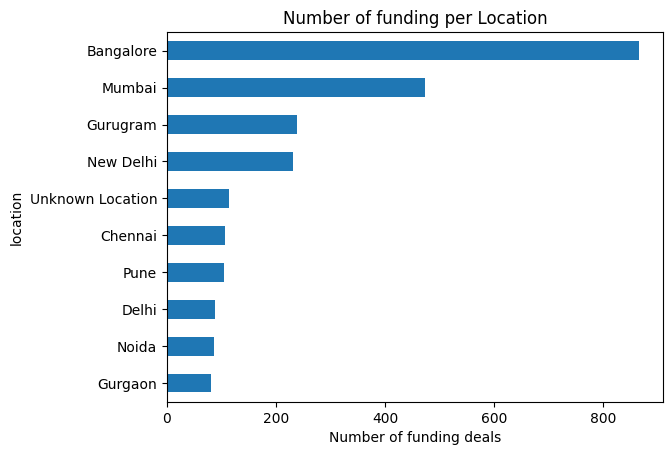

In [126]:
locations.head(10).sort_values().plot.barh()
plt.xlabel("Number of funding deals")
plt.ylabel("location")
plt.title("Number of funding per Location")

## What it does

From the above, it is seen that Bangalore (866) leads the pack (as the city with most startups involved in deals) by almost twice as much as the next location, Mumbai, which has 474. It also leaves a fair distance between itself and Gurugram (238), New Delhi (232), Unknown location (114), and Chennai (106) in that order.

In [127]:
complete_data_set["What it does"].apply(str)
complete_data_set["What it does"].fillna("Unknown",inplace = True)
complete_data_set["What it does"].replace("  "," ", inplace = True) # Replacing all double spaces
company_what_it_does= (complete_data_set.loc[:,"What it does"]).value_counts()
company_what_it_does

BYJU'S is an educational technology company that develops personalized learning programs for K-12 students.    5
Provides online learning classes                                                                               5
Mobile Premier League is a skill-based eSports platform used to offer cash prizes while playing games.         4
BharatPe develops a QR code-based payment app for offline retailers and businesses.                            4
Onine learning platform                                                                                        4
                                                                                                              ..
Known for its larger brands – Faasos, Behrouz Biryani, Oven story and Mandarin                                 1
Cosmetics & beauty products online                                                                             1
Crowdfunding, Charity, E-commerce                                                               

## Funding Year


In [128]:
complete_data_set["Year_of_Funding"].apply(str)
complete_data_set["Year_of_Funding"].fillna(np.nan,inplace = True)
funding_year = (complete_data_set.loc[:,"Year_of_Funding"]).value_counts()
funding_year = funding_year.sort_index()
funding_year

2018     526
2019      89
2020    1054
2021    1207
Name: Year_of_Funding, dtype: int64

Text(0.5, 1.0, 'Trend of funding deals from 2018-2021')

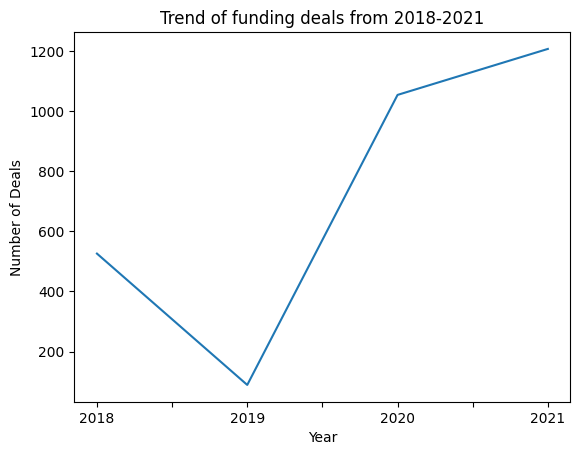

In [129]:
funding_year.plot()
plt.xlabel("Year")
plt.ylabel("Number of Deals")
plt.title("Trend of funding deals from 2018-2021")

In [130]:
complete_data_set.rename(columns={"Amount($)":"Amount"},inplace=True)

Here, we note that the number of funding deals, despite the big drop in 2019, is increasing. Number of funding deals increased from 525 in 2018 to 1190 in 2021. This implies that chances are fairly high that a new startup would be able to land a funding deal going forward since the number of deals is on an increasing trajectory.

What about the amounts? How have the total amounts invested changed over the period?

In [131]:
funding_year_amount = complete_data_set.groupby(by = "Year_of_Funding").Amount.agg(["count","sum","mean","median"])
funding_year_amount

,count,sum,mean,median
Year_of_Funding,,,,
2018,526,6427560803.80,12219697.35,500000.00
2019,89,3336433200.00,37488013.48,5500000.00
2020,1054,90680956646.23,86035063.23,1406700.00
2021,1207,179845512000.00,149002081.19,2500000.00


Text(0, 0.5, 'Total Amount Funding')

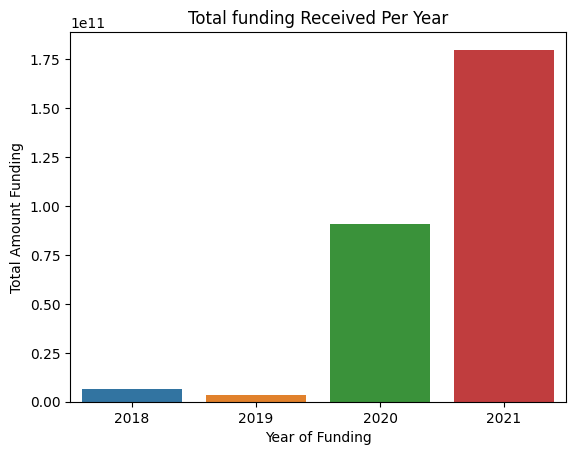

In [132]:
sns.barplot(x = funding_year_amount.index, y = funding_year_amount["sum"])
plt.title("Total funding Received Per Year")
plt.xlabel("Year of Funding")
plt.ylabel("Total Amount Funding")

We note that in line with the increasing number of deals over the period, total amounts invested have been increasing over the period, with investments in 2021 having the highest monetary value.

We must not ignore the fact that despite 2018 having a higher number of transactions, the average amount per deal (USD 12.7bn) was significantly less than that of 2019 (USD 37.5bn)

## Testing of Hypothesis
The research questions set in the initial stages of this data analysis workflow will be investigated.

1. What was the trend of start-up funding in India before the occurence of the COVID-19 pandemic (2018-2019)?
3. What was the trend of start-up funding in India during the occurence of the COVID-19 pandemic (2020-2021)




Text(0.5, 1.0, 'Trend of funding deals from 2018-2021')

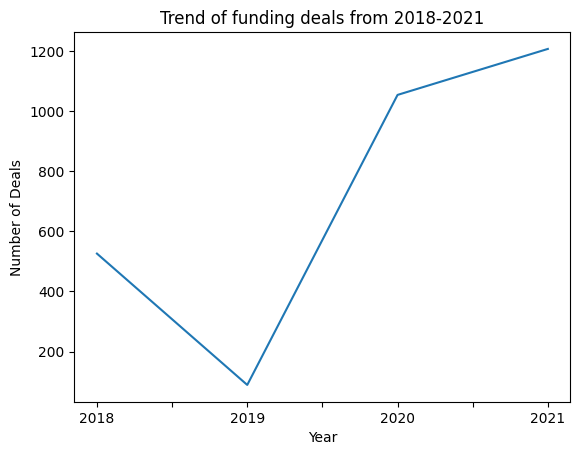

In [133]:
funding_year.plot()
plt.xlabel("Year")
plt.ylabel("Number of Deals")
plt.title("Trend of funding deals from 2018-2021")

In [134]:
complete_data_set.loc[complete_data_set["Company/Brand"] == "Super surfaces", "Sector"] = "Furniture & Home Decor"
complete_data_set.loc[complete_data_set["Company/Brand"]== "Design cafe", "Sector"] = "Furniture & Home Decor"
complete_data_set.loc[complete_data_set["Company/Brand"]== "Flipspaces", "Sector"] = "Furniture & Home Decor"

In [135]:
complete_data_set.loc[complete_data_set["Sector"]== "Agritech", "Sector"] = "Agriculture & agritech"
complete_data_set.loc[complete_data_set["Sector"]== "Agritech"]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount,Year_of_Funding,Founded,Founders,Investor,Investors,Headquarters


2. Which start-up sectors received the most funding before the pandemic?

In [136]:
year_2018_2019 = complete_data_set.loc[(complete_data_set["Year_of_Funding"]=="2018") | (complete_data_set["Year_of_Funding"]=="2019")]

In [137]:
sectors = (year_2018_2019.loc[:,"Sector"]).value_counts()
sectors = sectors.sort_index()

In [138]:
sectors_amount = year_2018_2019.groupby(by = "Sector").Amount.agg(["count","sum","mean","median"]).sort_values(ascending = False,by = "count").head(10)
sectors_amount

,count,sum,mean,median
Sector,,,,
Financial services,55,514851560.00,9360937.45,1000000.00
Education,37,1381613788.00,37340913.19,362400.00
Medicine & healthcare,35,171624625.00,4903560.71,200000.00
Food & Nutrition,33,1443907060.00,43754759.39,604000.00
E-commerce,33,519476800.00,15741721.21,2500000.00
—,30,51321136.00,1710704.53,411400.00
Automobiles & automotives,26,475819090.80,18300734.26,2000000.00
Software,25,137077300.00,5483092.00,362400.00
Ai,19,292215856.00,15379781.89,100000.00


Text(0, 0.5, 'Sectors')

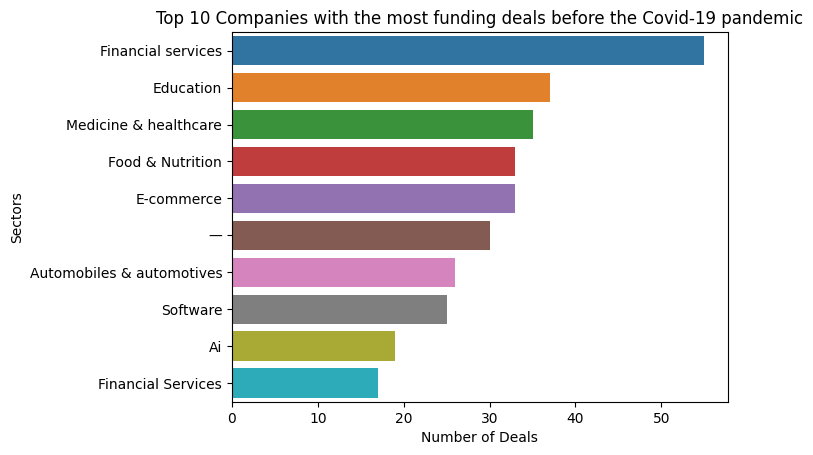

In [139]:
sns.barplot(x = sectors_amount["count"], y = sectors_amount.index)
plt.title("Top 10 Companies with the most funding deals before the Covid-19 pandemic")
plt.xlabel("Number of Deals")
plt.ylabel("Sectors")


In [140]:
sectors_amount = year_2018_2019.groupby(by = "Sector").Amount.agg(["count","sum","mean","median"]).sort_values(ascending = False,by = "sum").head(10)
sectors_amount

,count,sum,mean,median
Sector,,,,
Food & Nutrition,33,1443907060.00,43754759.39,604000.00
Education,37,1381613788.00,37340913.19,362400.00
Insurance,4,958500000.00,239625000.00,107750000.00
Tourism & Hospitality,8,806278800.00,100784850.00,1700000.00
Energy,6,577184200.00,96197366.67,12830000.00
E-commerce,33,519476800.00,15741721.21,2500000.00
Financial services,55,514851560.00,9360937.45,1000000.00
Automobiles & automotives,26,475819090.80,18300734.26,2000000.00
Travel & Transport,10,369166400.00,36916640.00,983200.00


Text(0, 0.5, 'Sectors')

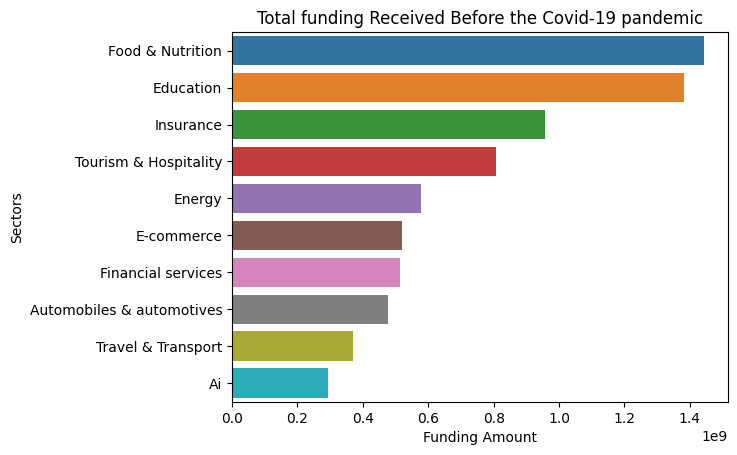

In [141]:
sns.barplot(x = sectors_amount["sum"], y = sectors_amount.index)
plt.title("Total funding Received Before the Covid-19 pandemic")
plt.xlabel("Funding Amount")
plt.ylabel("Sectors")

4. Which start-up sectors received the most funding during the COVID-19 pandemic?

In [142]:
year_2020_2021 = complete_data_set.loc[(complete_data_set["Year_of_Funding"]=="2020") | (complete_data_set["Year_of_Funding"]=="2021")]


In [143]:
sectors_pandemic = (year_2020_2021.loc[:,"Sector"]).value_counts()
sectors_pandemic= sectors_pandemic.sort_index()
sectors_pandemic



Advertising, marketing & sales    14
Advisory                           1
Advisory & consultancy             8
Agriculture & agritech            71
Agritech                           1
                                  ..
Warehouse                          1
Water purification                 1
Wholesale                          1
Wl & rac protection                1
Work fulfillment                   1
Name: Sector, Length: 177, dtype: int64

In [144]:
sectors_count_2020_2021= year_2020_2021.groupby(by = "Sector").Amount.agg(["count","sum","mean","median"]).sort_values(ascending = False,by = "count").head(10)
sectors_count_2020_2021


,count,sum,mean,median
Sector,,,,
Fintech,253,154745258900.00,611641339.53,5000000.00
Education,243,5498820030.00,22628889.01,1300000.00
Medicine & healthcare,193,2653339000.00,13747870.47,2000000.00
E-commerce,125,4171513800.00,33372110.40,3900000.00
Food & Nutrition,105,2767608800.00,26358179.05,1500000.00
Financial services,92,2926099000.00,31805423.91,5250000.00
Agriculture & agritech,71,669620000.00,9431267.61,2000000.00
Logistics & supply chain,57,1131618500.00,19852956.14,5500000.00
Automobiles & automotives,57,2639519000.00,46307350.88,4000000.00


Text(0, 0.5, 'Sector')

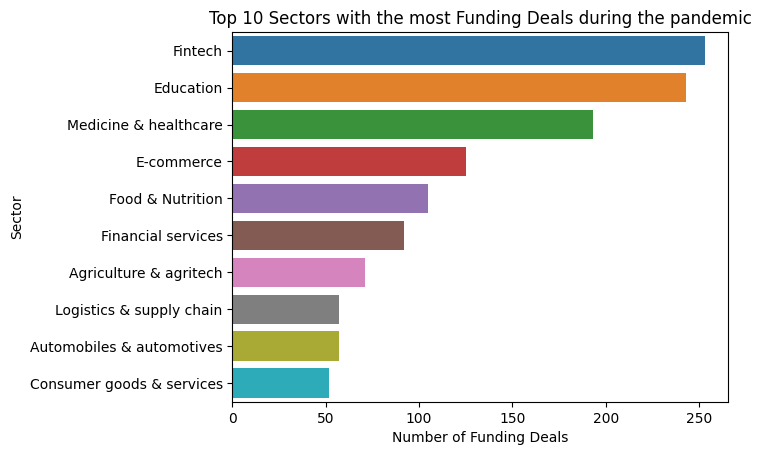

In [148]:
sns.barplot(x = sectors_count_2020_2021["count"], y = sectors_count_2020_2021.index)
plt.title("Top 10 Sectors with the most Funding Deals during the pandemic")
plt.xlabel("Number of Funding Deals")
plt.ylabel("Sector")

In [ ]:
sectors_amount = year_2020_2021.groupby(by = "Sector").Amount.agg(["count","sum","mean","median"]).sort_values(ascending = False,by = "sum").head(10)
sectors_amount

,count,sum,mean,median
Sector,,,,
Fintech,253,154745258900.00,611641339.53,5000000.00
Retail,27,70512700000.00,2611581481.48,4000000.00
Education,243,5498820030.00,22628889.01,1300000.00
E-commerce,125,4171513800.00,33372110.40,3900000.00
Tech,35,3418983900.00,97685254.29,1065000.00
Financial services,92,2926099000.00,31805423.91,5250000.00
Food & Nutrition,105,2767608800.00,26358179.05,1500000.00
Medicine & healthcare,193,2653339000.00,13747870.47,2000000.00
Automobiles & automotives,57,2639519000.00,46307350.88,4000000.00


Text(0, 0.5, 'Sectors')

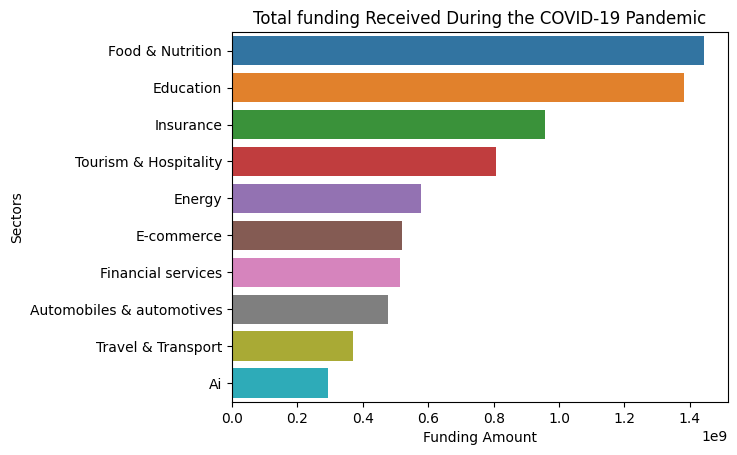

In [149]:
sns.barplot(x = sectors_amount["sum"], y = sectors_amount.index)
plt.title("Total funding Received During the COVID-19 Pandemic")
plt.xlabel("Funding Amount")
plt.ylabel("Sectors")

What was the total funding received each year before and after the COVID-19 pandemic?

Text(0, 0.5, 'Total Amount Funding')

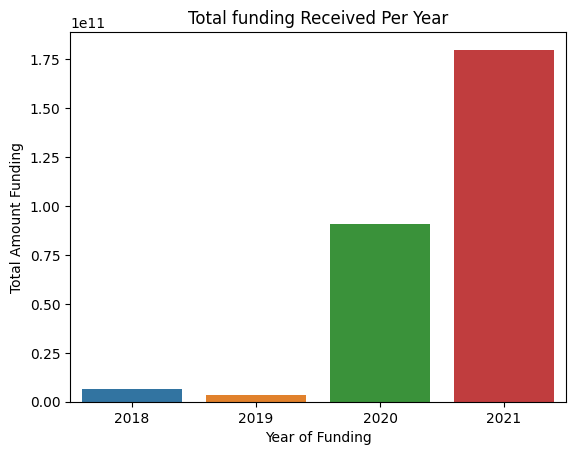

In [150]:
sns.barplot(x = funding_year_amount.index, y = funding_year_amount["sum"])
plt.title("Total funding Received Per Year")
plt.xlabel("Year of Funding")
plt.ylabel("Total Amount Funding")

## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

In [ ]:
# Code here

## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

In [ ]:
# Code here

# Feature processing
Here is the section to **clean** and **process** the features of the dataset.

## Missing/NaN Values
Handle the missing/NaN values using the Scikif-learn SimpleImputer

In [ ]:
# Code Here

## Scaling
Scale the numeric features using the Scikif-learn StandardScaler, MinMaxScaler, or another Scaler.

In [ ]:
# Code here

## Encoding
Encode the categorical features using the Scikif-learn OneHotEncoder.

In [ ]:
# Code here